# ÏÜåÏÑ§ ÏûëÍ∞Ä Î∂ÑÎ•ò AI Í≤ΩÏßÑÎåÄÌöå

https://dacon.io/competitions/official/235670/data


## ÌååÏù¥ÌîÑÎùºÏù∏


1. ÌîºÏ≤ò ÏÉùÏÑ±
2. Ï†ÑÏ≤òÎ¶¨(ÏÜåÎ¨∏Ïûê Î≥ÄÌôò, Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞)
3. ÏÉùÏÑ±Ìïú ÏàòÏπòÌòï ÌîºÏ≤òÎì§ÎÅºÎ¶¨ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
4. Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÎÑàÎ¨¥ ÎÜíÏùÄ ÏπºÎüºÏùÄ Ï†úÍ±∞(10Ïù¥ÏÉÅÏùÄ Ï†úÍ±∞ÌïòÎäî Í≤å Ï¢ãÏùå)
5. text ÏπºÎüº Î≤°ÌÑ∞Ìôî/ÏûÑÎ≤†Îî© ÌõÑ Í≤∞Ìï©(hstackÏúºÎ°ú?)
6. Î™®Îç∏ÎßÅ
7. Ï†ïÌôïÎèÑ ÌôïÏù∏

+) BERT Î™®Îç∏ÎßÅ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/test_x.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/sample_submission.csv')

-> Ïù¥Í±∞ ESAA OB 3Ï°∞ ÎìúÎùºÏù¥Î∏åÎ•º my driveÏóê Î∞îÎ°úÍ∞ÄÍ∏∞Î°ú ÏßÄÏ†ïÌï¥ÎÜìÏúºÎ©¥ Î™®Îëê Í∞ôÏùÄ Í≤ΩÎ°úÎ°ú ÌÜµÏùºÌï† Ïàò ÏûàÏñ¥Ïöî..!

In [ ]:
train.head()

index                                               text  author
0      0  He was almost choking. There was so much, so m...       3
1      1             ‚ÄúYour sister asked for it, I suppose?‚Äù       2
2      2   She was engaged one day as she walked, in per...       1
3      3  The captain was in the porch, keeping himself ...       4
4      4  ‚ÄúHave mercy, gentlemen!‚Äù odin flung up his han...       3

### 0. EDA ÏΩîÎìú

<Axes: >

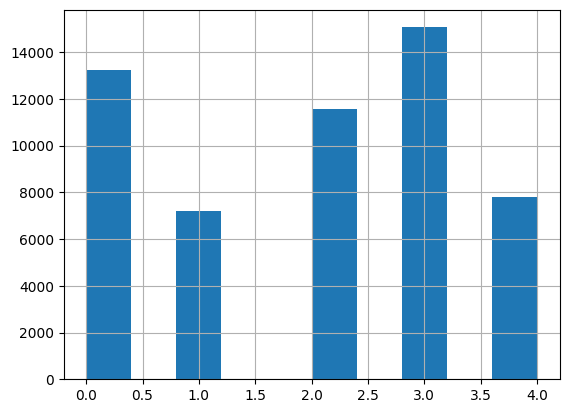

In [ ]:
train['author'].hist()

In [ ]:
train['author'].value_counts()

author
3    15063
0    13235
2    11554
4     7805
1     7222
Name: count, dtype: int64

- Ïù¥ÏÉÅÏπò ÏóÜÏùå ‚Üí Î™®Îì† ÏûëÍ∞ÄÎäî 7000Í∞ú Ïù¥ÏÉÅ ÏÉòÌîåÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ÏÑú ÌïôÏäµÏóêÎäî Ï∂©Î∂ÑÌï®

- author Í∞íÎèÑ 0~4 ÏÇ¨Ïù¥ Ï†ïÏàòÎ°ú Ïûò Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏùå

=> Îî∞ÎùºÏÑú, author Ïª¨Îüº Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò Ï†úÍ±∞Îäî ÌïÑÏöî ÏóÜÏùå

In [ ]:
train["text_length"] = train["text"].str.len()
test["text_length"] = test["text"].str.len()

print(train["text_length"].describe())

count    54879.000000
mean       228.115563
std        276.293793
min          9.000000
25%         63.000000
50%        118.000000
75%        265.000000
max       2500.000000
Name: text_length, dtype: float64


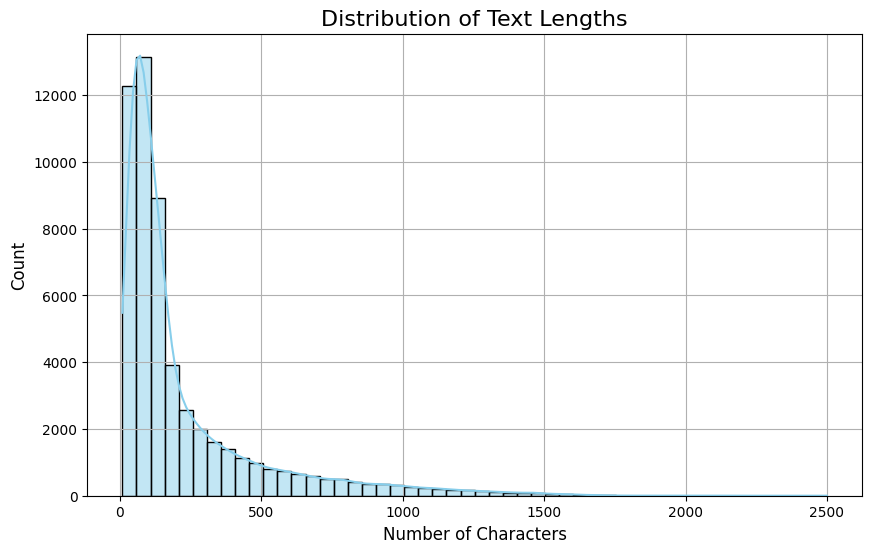

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train["text_length"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths", fontsize=16)
plt.xlabel("Number of Characters", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

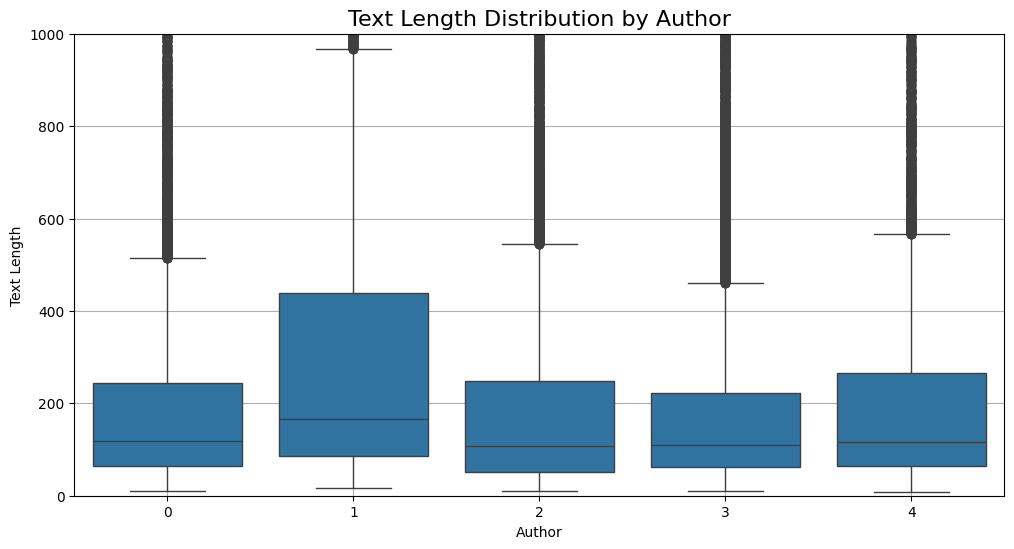

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="author", y="text_length", data=train)
plt.title("Text Length Distribution by Author", fontsize=16)
plt.xlabel("Author")
plt.ylabel("Text Length")
plt.ylim(0, 1000)  # ÎÑàÎ¨¥ Í∏¥ Í∞íÏùÄ ÏûòÎùºÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å
plt.grid(True)
plt.show()

### 2. ÌîºÏ≤ò ÏÉùÏÑ±

In [ ]:
!pip install textstat

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk import word_tokenize, pos_tag, ne_chunk, tree2conlltags
import string
from textstat import flesch_reading_ease # ÏùΩÍ∏∞ ÎÇúÏù¥ÎèÑ Ï†êÏàò

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

eng_stopwords = set(stopwords.words("english"))
symbols_knowns = string.ascii_letters + string.digits + string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data

In [ ]:
def sentiment_nltk(text): # Í∞êÏÑ± Ï†êÏàò
    res = SentimentIntensityAnalyzer().polarity_scores(text)
    return res['compound']

def get_words(text): # Íµ¨ÎëêÏ†ê Ï†úÍ±∞ ÌõÑ Îã®Ïñ¥Îßå Ï∂îÏ∂ú
    words = nltk.tokenize.word_tokenize(text)
    return [word for word in words if not word in string.punctuation]

def count_tokens(text, tokens): # ÌäπÏ†ï ÌÜ†ÌÅ∞Ïùò ÎπàÎèÑÏàò Ïπ¥Ïö¥Ìä∏
    return sum([w in tokens for w in get_words(text)])

def first_word_len(text): # ÌÖçÏä§Ìä∏Ïùò Ï≤´ Îã®Ïñ¥ Í∏∏Ïù¥
    if(len(get_words(text))==0):
        return 0
    else:
        return len(get_words(text)[0])

def last_word_len(text): # ÌÖçÏä§Ìä∏Ïùò ÎßàÏßÄÎßâ Îã®Ïñ¥ Í∏∏Ïù¥
    if(len(get_words(text))==0):
        return 0
    else:
        return len(get_words(text)[-1])

def symbol_aid(x): # ÏïåÌååÎ≤≥, Ïà´Ïûê, Í∏∞Ìò∏Îì§ Ï§ë xÏùò Ïù∏Îç±Ïä§ Î∞òÌôò
    symbols=[x for x in symbols_knowns]

    if x not in symbols:
        return -1
    else:
        return np.where(np.array(symbols) == x )[0][0]

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

def fraction_noun(text): # Î™ÖÏÇ¨ ÎπÑÏú®ÏùÑ POS ÌÉúÍπÖ Í∏∞Î∞òÏúºÎ°ú Í≥ÑÏÇ∞
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])

        return (noun_count/word_count)

def fraction_adj(text): # ÌòïÏö©ÏÇ¨ ÎπÑÏú®ÏùÑ POS ÌÉúÍπÖ Í∏∞Î∞òÏúºÎ°ú Í≥ÑÏÇ∞
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])

        return (adj_count/word_count)

def fraction_verbs(text): # ÎèôÏÇ¨ ÎπÑÏú®ÏùÑ POS ÌÉúÍπÖ Í∏∞Î∞òÏúºÎ°ú Í≥ÑÏÇ∞
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])

        return (verbs_count/word_count)


from collections import Counter

def repetition_score(text):
    words = text.lower().split()
    counts = Counter(words)
    return sum([v for v in counts.values() if v > 1]) / len(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train['num_words']=train['text'].apply(lambda x:len(get_words(x))) # Îã®Ïñ¥ Ïàò
train['mean_word_len']=train['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()])) # ÌèâÍ∑† Îã®Ïñ¥ Í∏∏Ïù¥
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split()))) # Í≥†Ïú† Îã®Ïñ¥ Ïàò
train["num_chars"] = train["text"].apply(lambda x: len(str(x))) # Î¨∏Ïûê Ïàò
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords])) # Î∂àÏö©Ïñ¥ Í∞úÏàò
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) ) # Íµ¨ÎëêÏ†ê Í∞úÏàò
train["num_words_upper"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))/train["num_words"] # ÎåÄÎ¨∏Ïûê Îã®Ïñ¥ ÎπÑÏú®
train["num_words_title"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))/train["num_words"] # Ï†úÎ™© Ïä§ÌÉÄÏùº Îã®Ïñ¥ ÎπÑÏú®
train["chars_between_comma"] = train["text"].apply(lambda x: np.mean([len(chunk) for chunk in str(x).split(",")]))/train["num_chars"] # ÏâºÌëúÎ°ú ÎÇòÎàà Ï°∞Í∞ÅÏùò ÌèâÍ∑† Í∏∏Ïù¥
train["symbols_unknowns"]=train["text"].apply(lambda x: np.sum([not w in symbols_knowns for w in str(x)]))/train["num_chars"] # Ïïå Ïàò ÏóÜÎäî Í∏∞Ìò∏ ÎπÑÏú®
train['noun'] = train["text"].apply(lambda x: fraction_noun(x)) # Î™ÖÏÇ¨ ÎπÑÏú®
train['adj'] = train["text"].apply(lambda x: fraction_adj(x)) # ÌòïÏö©ÏÇ¨ ÎπÑÏú®
train['verbs'] = train["text"].apply(lambda x: fraction_verbs(x)) # ÎèôÏÇ¨ ÎπÑÏú®
train["sentiment"]=train["text"].apply(sentiment_nltk) # Í∞êÏÑ± Ï†êÏàò (VADER)
train['single_frac'] = train['text'].apply(lambda x: count_tokens(x, ['is', 'was', 'has', 'he', 'she', 'it', 'her', 'his']))/train["num_words"] # Îã®ÏàòÌòï ÎπÑÏú®
train['plural_frac'] = train['text'].apply(lambda x: count_tokens(x, ['are', 'were', 'have', 'we', 'they']))/train["num_words"] # Î≥µÏàòÌòï ÎπÑÏú®
train['first_word_len']=train['text'].apply(first_word_len)/train["num_chars"] # Ï≤òÏùå Îã®Ïñ¥ Í∏∏Ïù¥
train['last_word_len']=train['text'].apply(last_word_len)/train["num_chars"] # ÎÅù Îã®Ïñ¥ Í∏∏Ïù¥
train["first_word_id"] = train['text'].apply(lambda x: symbol_aid(list(x.strip())[0])) # Ï≤òÏùå Îã®Ïñ¥ Ïù∏Îç±Ïä§
train["last_word_id"] = train['text'].apply(lambda x: symbol_aid(list(x.strip())[-1])) # ÎÅù Îã®Ïñ¥ Ïù∏Îç±Ïä§
train['ease']=train['text'].apply(flesch_reading_ease) # ÏùΩÍ∏∞ Ïâ¨ÏõÄ Ï†êÏàò


test['num_words']=test['text'].apply(lambda x:len(str(x).split()))
test['mean_word_len']=test['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))/test["num_words"]
test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))/test["num_words"]
test["chars_between_comma"] = test["text"].apply(lambda x: np.mean([len(chunk) for chunk in str(x).split(",")]))/test["num_chars"]
test["symbols_unknowns"]=test["text"].apply(lambda x: np.sum([not w in symbols_knowns for w in str(x)]))/test["num_chars"]
test['noun'] = test["text"].apply(lambda x: fraction_noun(x))
test['adj'] = test["text"].apply(lambda x: fraction_adj(x))
test['verbs'] = test["text"].apply(lambda x: fraction_verbs(x))
test["sentiment"]=test["text"].apply(sentiment_nltk)
test['single_frac'] = test['text'].apply(lambda x: count_tokens(x, ['is', 'was', 'has', 'he', 'she', 'it', 'her', 'his']))/test["num_words"]
test['plural_frac'] = test['text'].apply(lambda x: count_tokens(x, ['are', 'were', 'have', 'we', 'they']))/test["num_words"]
test['first_word_len']=test['text'].apply(first_word_len)/test["num_chars"]
test['last_word_len']=test['text'].apply(last_word_len)/test["num_chars"]
test["first_word_id"] = test['text'].apply(lambda x: symbol_aid(list(x.strip())[0]))
test["last_word_id"] = test['text'].apply(lambda x: symbol_aid(list(x.strip())[-1]))
test['ease']=test['text'].apply(flesch_reading_ease)

In [ ]:
# ÏâºÌëú Í∞úÏàò
train["num_commas"] = train["text"].apply(lambda x: x.count(","))
test["num_commas"] = test["text"].apply(lambda x: x.count(","))

# ÌäπÏ†ï Îã®Ïñ¥ Îì±Ïû• ÌöüÏàò
train["count_The"] = train["text"].apply(lambda x: x.count("The "))
test["count_The"] = test["text"].apply(lambda x: x.count("The "))

# ÎäêÎÇåÌëú Ïàò
train["count_exclam"] = train["text"].apply(lambda x: x.count("!"))
test["count_exclam"] = test["text"].apply(lambda x: x.count("!"))

# Î¨∏Ïû• Í∏∏Ïù¥ Í¥ÄÎ†® ÌîºÏ≥ê
# Î¨∏Ïû• Ïàò, ÌèâÍ∑† Î¨∏Ïû• Í∏∏Ïù¥ (Î¨∏Ïû• Íµ¨Ï°∞ÎÇò ÌùêÎ¶ÑÏùò Î≥µÏû°ÎèÑ ÌååÏïÖ Í∞ÄÎä•)
train["num_sentences"] = train["text"].apply(lambda x: len(sent_tokenize(x)))
train["mean_sentence_len"] = train["text"].apply(lambda x: np.mean([len(s.split()) for s in sent_tokenize(x)]))

test["num_sentences"] = test["text"].apply(lambda x: len(sent_tokenize(x)))
test["mean_sentence_len"] = test["text"].apply(lambda x: np.mean([len(s.split()) for s in sent_tokenize(x)]))

# Ïñ¥Ìúò Îã§ÏñëÏÑ± ÎπÑÏú® (Type-Token Ration)
train["ttr"] = train["num_unique_words"] / train["num_words"]
test["ttr"] = test["num_unique_words"] / test["num_words"]

# Ïñ¥Ìúò ÏàòÏ§Ä (ÌÖçÏä§Ìä∏Ïùò ÎÇúÏù¥ÎèÑ ÎòêÎäî Îã®Ïñ¥Ïùò Í∏∏Ïù¥/ÎπàÎèÑ Í∏∞Î∞ò) - Í≥†Í∏â Ïñ¥ÌúòÏù∏ÏßÄ Ïó¨Î∂Ä
from nltk.corpus import words
nltk.download('words')
english_vocab = set(words.words())

train["rare_word_count"] = train["text"].apply(lambda x: sum(1 for w in x.split() if w.lower() not in english_vocab))
train["rare_word_ratio"] = train["rare_word_count"] / train["num_words"]

test["rare_word_count"] = test["text"].apply(lambda x: sum(1 for w in x.split() if w.lower() not in english_vocab))
test["rare_word_ratio"] = test["rare_word_count"] / test["num_words"]

# ÎèôÏùº Îã®Ïñ¥ Î∞òÎ≥µÎ•†
train["repetition_rate"] = train["text"].apply(repetition_score)
test["repetition_rate"] = test["text"].apply(repetition_score)

# ÏßàÎ¨∏ ÏÇ¨Ïö© Ïó¨Î∂Ä
train["num_questions"] = train["text"].apply(lambda x: x.count("?"))
test["num_questions"] = test["text"].apply(lambda x: x.count("?"))

# Ïù∏Ïö© Î∂ÄÌò∏ ÏÇ¨Ïö©
train["num_quotes"] = train["text"].apply(lambda x: x.count('"') + x.count("'"))
test["num_quotes"] = test["text"].apply(lambda x: x.count('"') + x.count("'"))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


- Ï∂ïÏïΩÌòï Ìï®Ïàò

In [ ]:
# contraction dict
contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

# ÏÜåÎ¨∏Ïûê Í∏∞Î∞òÏúºÎ°ú Ï∂ïÏïΩÌòï Î¶¨Ïä§Ìä∏ Ï§ÄÎπÑ
contraction_list = list(contractions.keys())
contraction_pattern = re.compile(r'\b(' + '|'.join(re.escape(c) for c in contraction_list) + r')\b', flags=re.IGNORECASE)

# Ï∂ïÏïΩÌòï Í∞úÏàò ÏÑ∏Îäî Ìï®Ïàò
def count_contractions(text):
    return len(contraction_pattern.findall(text.lower()))

# Í∞Å rowÏóê Ï†ÅÏö©
train['contraction_count'] = train['text'].apply(count_contractions)

test['contraction_count'] = test['text'].apply(count_contractions)

### Ï†ÑÏ≤òÎ¶¨


#### (0) Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [ ]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏
train['length'] = train['text'].map(len)
test['length'] = test['text'].map(len)
train[train['length'] <= 12]

index        text  author  text_length  num_words  mean_word_len  \
1455    1455   * * * * *       2           10          0            1.0   
3493    3493   * * * * *       4           10          0            1.0   
5523    5523   * * * * *       4           10          0            1.0   
5985    5985   * * * * *       4           10          0            1.0   
8400    8400   * * * * *       2           10          0            1.0   
9874    9874   * * * * *       3           10          0            1.0   
12267  12267   * * * * *       2           10          0            1.0   
12460  12460   * * * * *       4           10          0            1.0   
13055  13055   * * * * *       4           10          0            1.0   
14698  14698   * * * * *       4           10          0            1.0   
15958  15958   * * * * *       4           10          0            1.0   
18475  18475   * * * * *       4           10          0            1.0   
19802  19802   * * * * *       0           10          0            1.0   
22532  22532   * * * * *       4           10          0            1.0   
23137  23137   * * * * *       4           10          0            1.0   
23211  23211   * * * * *       4           10          0            1.0   
23829  23829   * * * * *       4            9          0            1.0   
24589  24589   * * * * *       4           10          0            1.0   
25719  25719   * * * * *       0           10          0            1.0   
27424  27424   * * * * *       4           10          0            1.0   
27575  27575   * * * * *       4           10          0            1.0   
27811  27811   * * * * *       4           10          0            1.0   
28023  28023   * * * * *       2           10          0            1.0   
28224  28224   * * * * *       4           10          0            1.0   
28917  28917   * * * * *       4           10          0            1.0   
35594  35594   * * * * *       4           10          0            1.0   
35754  35754   * * * * *       4           10          0            1.0   
38536  38536   * * * * *       4           10          0            1.0   
39121  39121   * * * * *       4           10          0            1.0   
40152  40152   * * * * *       2           10          0            1.0   
43324  43324   * * * * *       4           10          0            1.0   
43464  43464   * * * * *       4           10          0            1.0   
43686  43686   * * * * *       2           10          0            1.0   
43706  43706   * * * * *       4           10          0            1.0   
47345  47345   * * * * *       4           10          0            1.0   
47525  47525   * * * * *       4           10          0            1.0   
47699  47699   * * * * *       2           10          0            1.0   
47783  47783   * * * * *       2           10          0            1.0   
49308  49308   * * * * *       4           10          0            1.0   
50326  50326   * * * * *       4           10          0            1.0   
50343  50343   * * * * *       4           10          0            1.0   
50963  50963   * * * * *       2           10          0            1.0   
52675  52675   * * * * *       0           10          0            1.0   
54750  54750   * * * * *       4           10          0            1.0   

       num_unique_words  num_chars  num_stopwords  num_punctuations  ...  \
1455                  1         10              0                 5  ...   
3493                  1         10              0                 5  ...   
5523                  1         10              0                 5  ...   
5985                  1         10              0                 5  ...   
8400                  1         10              0                 5  ...   
9874                  1         10              0                 5  ...   
12267                 1         10              0                 5  ...   
12460                 1

In [ ]:
# '*****' Ï†úÍ±∞
train = train[train['length'] > 12]
test = test[test['length'] > 12]

In [ ]:
# Ï§ëÎ≥µ ÌÖçÏä§Ìä∏ Ï†úÍ±∞
train = train.drop_duplicates(subset='text')
test = test.drop_duplicates(subset='text')

ÌäπÏàòÎ¨∏ÏûêÍ∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅÏù∏ ÌÖçÏä§Ìä∏Î•º Ï†úÍ±∞ÌïòÎäî ÏΩîÎìú

In [ ]:
import re

def is_mostly_special(text):
    text = str(text).strip()
    if len(text) == 0:
        return True  # Îπà Î¨∏ÏûêÏó¥ÎèÑ Ï†úÍ±∞ ÎåÄÏÉÅ
    return len(re.sub(r'[A-Za-z0-9Í∞Ä-Ìû£]', '', text)) / len(text) > 0.5

# ÌäπÏàòÎ¨∏ÏûêÍ∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅÏù∏ ÌÖçÏä§Ìä∏Î•º Ï†úÍ±∞Ìïú train Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
train = train[~train['text'].map(is_mostly_special)].reset_index(drop=True)
test = test[~test['text'].map(is_mostly_special)].reset_index(drop=True)

- ÎåÄÎ¨∏ÏûêÎ•º Îã§ ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî ÏΩîÎìú

In [ ]:
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()

#### (1) ÎùÑÏñ¥Ïì∞Í∏∞, ÌÜ†ÌÅ∞Ìôî

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# ÌÜ†ÌÅ∞Ìôî Ìï®Ïàò Ï†ïÏùò
def tokenize_text(text):
    return word_tokenize(text)

# train Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
train['tokens'] = train['text'].apply(tokenize_text)
test['tokens'] = test['text'].apply(tokenize_text)

#### (2) Î∂àÏö©Ïñ¥, Ïñ¥Í∞Ñ Ï∂îÏ∂ú

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# 1) Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ÏôÄ Ïä§ÌÖåÎ®∏ Ï§ÄÎπÑ
eng_stopwords = {
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"}
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò:
# ÌÜ†ÌÅ∞Ìôî ‚Üí Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ‚Üí Ïä§ÌÖåÎ∞ç
def preprocess(tokens: list[str]):
    # (b) Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    filtered = [w for w in tokens if w.isalpha() and w not in eng_stopwords]
    # (c) Ïñ¥Í∞Ñ Ï∂îÏ∂ú
    stems = [stemmer.stem(w) for w in filtered]
    return stems, filtered


# Ï†ÑÏ≤òÎ¶¨(Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Ïä§ÌÖåÎ∞ç) Ï†ÅÏö©
# preprocess()Í∞Ä (stems, filtered_stopwords_removed_tokens)Î•º Î¶¨ÌÑ¥ÌïòÎØÄÎ°ú unpack
train[["stems", "_filtered_tokens"]] = train["tokens"].apply(
    lambda toks: pd.Series(preprocess(toks), index=["stems", "_filtered_tokens"])
)
test[["stems", "_filtered_tokens"]] = test["tokens"].apply(
    lambda toks: pd.Series(preprocess(toks), index=["stems", "_filtered_tokens"])
)

# ÌÜµÍ≥Ñ Ïª¨Îüº Í≥ÑÏÇ∞
# Ïñ¥Í∞Ñ Í∞úÏàò
train["num_stems"] = train["stems"].apply(len)
test["num_stems"] = test["stems"].apply(len)

# Î∂àÏö©Ïñ¥ Í∞úÏàò: Ïõê ÌÜ†ÌÅ∞ Ï§ë stopwordÏòÄÎçò Í∞úÏàò
train["num_stopwords"] = train["tokens"].apply(
    lambda toks: sum(1 for w in toks if w.isalpha() and w in eng_stopwords)
)
test["num_stopwords"] = test["tokens"].apply(
    lambda toks: sum(1 for w in toks if w.isalpha() and w in eng_stopwords)
)

# Ï†ÑÏ≤¥ ÌÜ†ÌÅ∞ Í∞úÏàò (ÏïåÌååÎ≤≥ Îã®Ïñ¥ Í∏∞Ï§Ä)
train["num_tokens"] = train["tokens"].apply(lambda toks: sum(1 for w in toks if w.isalpha()))
test["num_tokens"] = test["tokens"].apply(lambda toks: sum(1 for w in toks if w.isalpha()))

# Î∂àÏö©Ïñ¥ ÎπÑÏú®
train["stopword_ratio"] = train["num_stopwords"] / train["num_tokens"]
test["stopword_ratio"] = test["num_stopwords"] / test["num_tokens"]

# 8) Í≤∞Í≥º ÌôïÏù∏
print(train[[
    "author", "num_stems", "num_stopwords", "num_tokens", "stopword_ratio"
]].head())

   author  num_stems  num_stopwords  num_tokens  stopword_ratio
0       3         17             29          46        0.630435
1       2          3              4           7        0.571429
2       1         27             30          57        0.526316
3       4         26             31          57        0.543860
4       3         20             21          41        0.512195


In [ ]:
print(test[["num_stems", "num_stopwords", "num_tokens", "stopword_ratio"]].head())

   num_stems  num_stopwords  num_tokens  stopword_ratio
0         32             57          89        0.640449
1         10             36          46        0.782609
2         28             35          63        0.555556
3         92            148         240        0.616667
4         35             58          93        0.623656


#### (3) ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞

In [ ]:
grouped_df = train.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  0
'you were not here last sunday night,' he said.
i had scant luggage to take with me to london, for little of the little i possessed was adapted to my new station. but i began packing that same afternoon, and wildly packed up things that i knew i should want next morning, in a fiction that there was not a moment to be lost.
‚Äòwhy, the fact is,‚Äô returned odin, ‚Äòmr. odin had so completely hemmed him in, and was always ready with so many new points if an old one failed, that he could not escape from us. a most remarkable circumstance is, that i really don‚Äôt think he grasped this sum even so much for the gratification of his avarice, which was inordinate, as in the hatred he felt for odin. he said so to me, plainly. he said he would even have spent as much, to baulk or injure odin.‚Äô
dora was delighted with the little presents, and kissed me joyfully; but there was a shadow between us, however slight, and i had made up my mind that it should not be there. if there m

- Stemming

In [ ]:
from nltk.stem import PorterStemmer

# be ÎèôÏÇ¨Îßå ÏùºÎã® Î∂àÏö©Ïñ¥Î°ú ÏßÄÏ†ïÌï¥Î¥Ñ
be_forms = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been'}

stemmer = PorterStemmer()

train['stemmed_tokens'] = train['_filtered_tokens'].apply(
    lambda tokens: [stemmer.stem(token) for token in tokens if token.lower() not in be_forms])

test['stemmed_tokens'] = test['_filtered_tokens'].apply(
    lambda tokens: [stemmer.stem(token) for token in tokens if token.lower() not in be_forms])

In [ ]:
# stemmed_tokensÏóêÏÑú Í≥µÎ∞±Ïù¥ÎÇò Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞
train['stemmed_tokens'] = train['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip() != ''])

test['stemmed_tokens'] = test['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip() != ''])

In [ ]:
train.head()

index                                               text  author  \
0      0  he was almost choking. there was so much, so m...       3   
1      1             ‚Äúyour sister asked for it, i suppose?‚Äù       2   
2      2   she was engaged one day as she walked, in per...       1   
3      3  the captain was in the porch, keeping himself ...       4   
4      4  ‚Äúhave mercy, gentlemen!‚Äù odin flung up his han...       3   

   text_length  num_words  mean_word_len  num_unique_words  num_chars  \
0          240         46       4.239130                39        240   
1           38          9       4.571429                 7         38   
2          320         59       4.614035                50        320   
3          319         61       4.517241                49        319   
4          228         48       4.871795                36        228   

   num_stopwords  num_punctuations  ...  num_quotes  contraction_count  \
0             29                 8  ...           0                  0   
1              4                 2  ...           0                  0   
2             30                 9  ...           0                  0   
3             31                18  ...           1                  0   
4             21                13  ...           0                  0   

   length                                             tokens  \
0     240  [he, was, almost, choking, ., there, was, so, ...   
1      38  [‚Äú, your, sister, asked, for, it, ,, i, suppos...   
2     320  [she, was, engaged, one, day, as, she, walked,...   
3     319  [the, captain, was, in, the, porch, ,, keeping...   
4     228  [‚Äú, have, mercy, ,, gentlemen, !, ‚Äù, odin, flu...   

                                               stems  \
0  [choke, want, say, strang, exclam, came, lip, ...   
1                              [sister, ask, suppos]   
2  [engag, day, walk, perus, jane, s, letter, dwe...   
3  [captain, porch, keep, care, way, treacher, sh...   
4  [merci, gentlemen, odin, flung, hand, don, t, ...   

                                    _filtered_tokens  num_stems  num_tokens  \
0  [choking, wanted, say, strange, exclamations, ...         17          46   
1                           [sister, asked, suppose]          3           7   
2  [engaged, day, walked, perusing, jane, s, lett...         27          57   
3  [captain, porch, keeping, carefully, way, trea...         26          57   
4  [mercy, gentlemen, odin, flung, hands, don, t,...         20          41   

   stopword_ratio                                     stemmed_tokens  
0        0.630435  [choke, want, say, strang, exclam, came, lip, ...  
1        0.571429                              [sister, ask, suppos]  
2        0.526316  [engag, day, walk, perus, jane, s, letter, dwe...  
3        0.543860  [captain, porch, keep, care, way, treacher, sh...  
4        0.512195  [merci, gentlemen, odin, flung, hand, don, t, ...  

[5 rows x 45 columns]

In [ ]:
grouped_df = train.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["stemmed_tokens"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  0
['sunday', 'night', 'said']
['scant', 'luggag', 'london', 'littl', 'littl', 'possess', 'adapt', 'new', 'station', 'began', 'pack', 'afternoon', 'wildli', 'pack', 'thing', 'knew', 'want', 'morn', 'fiction', 'moment', 'lost']
['fact', 'return', 'odin', 'mr', 'odin', 'complet', 'hem', 'readi', 'new', 'point', 'old', 'fail', 'escap', 'remark', 'circumst', 'realli', 'don', 't', 'think', 'grasp', 'sum', 'gratif', 'avaric', 'inordin', 'hatr', 'felt', 'odin', 'said', 'plainli', 'said', 'spent', 'baulk', 'injur', 'odin']
['dora', 'delight', 'littl', 'present', 'kiss', 'joy', 'shadow', 'slight', 'mind', 'shadow', 'futur', 'breast']
['kind', 'tone', 'answer', 'sweet', 'voic', 'gentl', 'manner', 'absenc', 'accent', 'haughti', 'displeasur', 'took', 'girl', 'complet', 'surpris', 'burst', 'tear']


Author name :  1
['engag', 'day', 'walk', 'perus', 'jane', 's', 'letter', 'dwell', 'passag', 'prove', 'jane', 'written', 'spirit', 'instead', 'surpris', 'odin', 'saw', 'look', 'odin', 'mee

- Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

# be ÎèôÏÇ¨ Î™©Î°ù
be_forms = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been'}

lemmatizer = WordNetLemmatizer()

train['lemmatized_tokens'] = train['_filtered_tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens if token.lower() not in be_forms])

test['lemmatized_tokens'] = test['_filtered_tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens if token.lower() not in be_forms])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
train.head()

index                                               text  author  \
0      0  he was almost choking. there was so much, so m...       3   
1      1             ‚Äúyour sister asked for it, i suppose?‚Äù       2   
2      2   she was engaged one day as she walked, in per...       1   
3      3  the captain was in the porch, keeping himself ...       4   
4      4  ‚Äúhave mercy, gentlemen!‚Äù odin flung up his han...       3   

   text_length  num_words  mean_word_len  num_unique_words  num_chars  \
0          240         46       4.239130                39        240   
1           38          9       4.571429                 7         38   
2          320         59       4.614035                50        320   
3          319         61       4.517241                49        319   
4          228         48       4.871795                36        228   

   num_stopwords  num_punctuations  ...  contraction_count  length  \
0             29                 8  ...                  0     240   
1              4                 2  ...                  0      38   
2             30                 9  ...                  0     320   
3             31                18  ...                  0     319   
4             21                13  ...                  0     228   

                                              tokens  \
0  [he, was, almost, choking, ., there, was, so, ...   
1  [‚Äú, your, sister, asked, for, it, ,, i, suppos...   
2  [she, was, engaged, one, day, as, she, walked,...   
3  [the, captain, was, in, the, porch, ,, keeping...   
4  [‚Äú, have, mercy, ,, gentlemen, !, ‚Äù, odin, flu...   

                                               stems  \
0  [choke, want, say, strang, exclam, came, lip, ...   
1                              [sister, ask, suppos]   
2  [engag, day, walk, perus, jane, s, letter, dwe...   
3  [captain, porch, keep, care, way, treacher, sh...   
4  [merci, gentlemen, odin, flung, hand, don, t, ...   

                                    _filtered_tokens  num_stems  num_tokens  \
0  [choking, wanted, say, strange, exclamations, ...         17          46   
1                           [sister, asked, suppose]          3           7   
2  [engaged, day, walked, perusing, jane, s, lett...         27          57   
3  [captain, porch, keeping, carefully, way, trea...         26          57   
4  [mercy, gentlemen, odin, flung, hands, don, t,...         20          41   

   stopword_ratio                                     stemmed_tokens  \
0        0.630435  [choke, want, say, strang, exclam, came, lip, ...   
1        0.571429                              [sister, ask, suppos]   
2        0.526316  [engag, day, walk, perus, jane, s, letter, dwe...   
3        0.543860  [captain, porch, keep, care, way, treacher, sh...   
4        0.512195  [merci, gentlemen, odin, flung, hand, don, t, ...   

                                   lemmatized_tokens  
0  [choke, want, say, strange, exclamations, come...  
1                             [sister, ask, suppose]  
2  [engage, day, walk, peruse, jane, s, letter, d...  
3  [captain, porch, keep, carefully, way, treache...  
4  [mercy, gentlemen, odin, fling, hand, don, t, ...  

[5 rows x 46 columns]

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

# be ÎèôÏÇ¨ Î™©Î°ù
be_forms = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been'}

# ÌíàÏÇ¨ ÌÉúÍ∑∏Î•º WordNet POS ÌÉúÍ∑∏Î°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò
def pos_tag_to_wordnet(tag):
    if tag.startswith('VB'):
        return 'v'  # ÎèôÏÇ¨
    elif tag.startswith('NN'):
        return 'n'  # Î™ÖÏÇ¨
    elif tag.startswith('JJ'):
        return 'a'  # ÌòïÏö©ÏÇ¨
    else:
        return None

lemmatizer = WordNetLemmatizer()

# ÌíàÏÇ¨ ÌÉúÍπÖ ÌõÑ Lemmatization Ï†ÅÏö©
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # be ÎèôÏÇ¨ Ï†úÏô∏
        if token.lower() not in be_forms:
            wordnet_pos = pos_tag_to_wordnet(tag)  # POS ÌÉúÍ∑∏ Îß§Ìïë
            if wordnet_pos:  # Îß§ÌïëÎêú ÌíàÏÇ¨Í∞Ä ÏûàÏúºÎ©¥
                lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=wordnet_pos))
            else:
                lemmatized_tokens.append(token)  # ÌíàÏÇ¨Í∞Ä ÏóÜÏúºÎ©¥ ÏõêÌòï Í∑∏ÎåÄÎ°ú
    return lemmatized_tokens

train['lemmatized_tokens'] = train['_filtered_tokens'].apply(lemmatize_with_pos)

In [ ]:
test['lemmatized_tokens'] = test['_filtered_tokens'].apply(lemmatize_with_pos)

In [ ]:
grouped_df = train.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["lemmatized_tokens"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  0
['sunday', 'night', 'say']
['scant', 'luggage', 'london', 'little', 'little', 'possess', 'adapt', 'new', 'station', 'begin', 'pack', 'afternoon', 'wildly', 'pack', 'thing', 'know', 'want', 'morning', 'fiction', 'moment', 'lose']
['fact', 'return', 'odin', 'mr', 'odin', 'completely', 'hem', 'ready', 'new', 'point', 'old', 'fail', 'escape', 'remarkable', 'circumstance', 'really', 'don', 't', 'think', 'grasp', 'sum', 'gratification', 'avarice', 'inordinate', 'hatred', 'felt', 'odin', 'say', 'plainly', 'say', 'spent', 'baulk', 'injure', 'odin']
['dora', 'delight', 'little', 'present', 'kiss', 'joyfully', 'shadow', 'slight', 'mind', 'shadow', 'future', 'breast']
['kind', 'tone', 'answer', 'sweet', 'voice', 'gentle', 'manner', 'absence', 'accent', 'haughtiness', 'displeasure', 'take', 'girl', 'completely', 'surprise', 'burst', 'tear']


Author name :  1
['engage', 'day', 'walk', 'peruse', 'jane', 's', 'letter', 'dwell', 'passage', 'prove', 'jane', 'write', 'spirit', 'instead

#### (+) Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ CSVÎ°ú Ï†ÄÏû•

In [ ]:
# CSVÎ°ú Ï†ÄÏû•
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)

In [ ]:
import os

save_dir = '/content/drive/MyDrive/ESAA OB 3Ï°∞/ÌîÑÎ°úÏ†ùÌä∏(2)_ÏÜåÏÑ§ÏûëÍ∞Ä Î∂ÑÎ•ò/'
os.makedirs(save_dir, exist_ok=True)

train.to_csv(os.path.join(save_dir, 'train_cleaned.csv'), index=False, encoding='utf-8-sig')
test.to_csv(os.path.join(save_dir, 'test_cleaned.csv'),  index=False, encoding='utf-8-sig')

### ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/train_cleaned.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/test_cleaned.csv')

In [ ]:
train.head()

index                                               text  author  \
0      0  he was almost choking. there was so much, so m...       3   
1      1             ‚Äúyour sister asked for it, i suppose?‚Äù       2   
2      2   she was engaged one day as she walked, in per...       1   
3      3  the captain was in the porch, keeping himself ...       4   
4      4  ‚Äúhave mercy, gentlemen!‚Äù odin flung up his han...       3   

   text_length  num_words  mean_word_len  num_unique_words  num_chars  \
0          240         46       4.239130                39        240   
1           38          9       4.571429                 7         38   
2          320         59       4.614035                50        320   
3          319         61       4.517241                49        319   
4          228         48       4.871795                36        228   

   num_stopwords  num_punctuations  ...  contraction_count  length  \
0             29                 8  ...                  0     240   
1              4                 2  ...                  0      38   
2             30                 9  ...                  0     320   
3             31                18  ...                  0     319   
4             21                13  ...                  0     228   

                                              tokens  \
0  ['he', 'was', 'almost', 'choking', '.', 'there...   
1  ['‚Äú', 'your', 'sister', 'asked', 'for', 'it', ...   
2  ['she', 'was', 'engaged', 'one', 'day', 'as', ...   
3  ['the', 'captain', 'was', 'in', 'the', 'porch'...   
4  ['‚Äú', 'have', 'mercy', ',', 'gentlemen', '!', ...   

                                               stems  \
0  ['choke', 'want', 'say', 'strang', 'exclam', '...   
1                        ['sister', 'ask', 'suppos']   
2  ['engag', 'day', 'walk', 'perus', 'jane', 's',...   
3  ['captain', 'porch', 'keep', 'care', 'way', 't...   
4  ['merci', 'gentlemen', 'odin', 'flung', 'hand'...   

                                    _filtered_tokens  num_stems  num_tokens  \
0  ['choking', 'wanted', 'say', 'strange', 'excla...         17          46   
1                     ['sister', 'asked', 'suppose']          3           7   
2  ['engaged', 'day', 'walked', 'perusing', 'jane...         27          57   
3  ['captain', 'porch', 'keeping', 'carefully', '...         26          57   
4  ['mercy', 'gentlemen', 'odin', 'flung', 'hands...         20          41   

   stopword_ratio                                     stemmed_tokens  \
0        0.630435  ['choke', 'want', 'say', 'strang', 'exclam', '...   
1        0.571429                        ['sister', 'ask', 'suppos']   
2        0.526316  ['engag', 'day', 'walk', 'perus', 'jane', 's',...   
3        0.543860  ['captain', 'porch', 'keep', 'care', 'way', 't...   
4        0.512195  ['merci', 'gentlemen', 'odin', 'flung', 'hand'...   

                                   lemmatized_tokens  
0  ['choke', 'want', 'say', 'strange', 'exclamati...  
1                       ['sister', 'ask', 'suppose']  
2  ['engage', 'day', 'walk', 'peruse', 'jane', 's...  
3  ['captain', 'porch', 'keep', 'carefully', 'way...  
4  ['mercy', 'gentleman', 'odin', 'flung', 'hand'...  

[5 rows x 46 columns]

In [ ]:
test.head()

index                                               text  text_length  \
0      0  ‚Äúnot at all. i think she is one of the most ch...          456   
1      1  "no," replied he, with sudden consciousness, "...          221   
2      2  as the lady had stated her intention of scream...          375   
3      3  ‚Äúand then suddenly in the silence i heard a so...         1218   
4      4  his conviction remained unchanged. so far as i...          510   

   num_words  mean_word_len  num_unique_words  num_chars  num_stopwords  \
0         89       4.134831                68        456             57   
1         43       4.162791                36        221             36   
2         64       4.875000                55        375             35   
3        240       4.079167               150       1218            148   
4         91       4.615385                71        510             58   

   num_punctuations  num_words_upper  ...  contraction_count  length  \
0                 9         0.056180  ...                  0     456   
1                20         0.116279  ...                  0     221   
2                10         0.000000  ...                  0     375   
3                28         0.045833  ...                  0    1218   
4                13         0.043956  ...                  0     510   

                                              tokens  \
0  ['‚Äú', 'not', 'at', 'all', '.', 'i', 'think', '...   
1  ['``', 'no', ',', "''", 'replied', 'he', ',', ...   
2  ['as', 'the', 'lady', 'had', 'stated', 'her', ...   
3  ['‚Äú', 'and', 'then', 'suddenly', 'in', 'the', ...   
4  ['his', 'conviction', 'remained', 'unchanged',...   

                                               stems  \
0  ['think', 'charm', 'young', 'ladi', 'met', 'us...   
1  ['repli', 'sudden', 'conscious', 'ignor', 'goo...   
2  ['ladi', 'state', 'intent', 'scream', 'cours',...   
3  ['sudden', 'silenc', 'heard', 'sound', 'sent',...   
4  ['convict', 'remain', 'unchang', 'far', 'know'...   

                                    _filtered_tokens  num_stems  num_tokens  \
0  ['think', 'charming', 'young', 'ladies', 'met'...         32          89   
1  ['replied', 'sudden', 'consciousness', 'ignora...         10          46   
2  ['lady', 'stated', 'intention', 'screaming', '...         28          63   
3  ['suddenly', 'silence', 'heard', 'sound', 'sen...         92         240   
4  ['conviction', 'remained', 'unchanged', 'far',...         35          93   

   stopword_ratio                                     stemmed_tokens  \
0        0.640449  ['think', 'charm', 'young', 'ladi', 'met', 'us...   
1        0.782609  ['repli', 'sudden', 'conscious', 'ignor', 'goo...   
2        0.555556  ['ladi', 'state', 'intent', 'scream', 'cours',...   
3        0.616667  ['suddenli', 'silenc', 'heard', 'sound', 'sent...   
4        0.623656  ['convict', 'remain', 'unchang', 'far', 'know'...   

                                   lemmatized_tokens  
0  ['think', 'charm', 'young', 'lady', 'meet', 'u...  
1  ['reply', 'sudden', 'consciousness', 'ignorant...  
2  ['lady', 'state', 'intention', 'scream', 'cour...  
3  ['suddenly', 'silence', 'heard', 'sound', 'sen...  
4  ['conviction', 'remain', 'unchanged', 'far', '...  

[5 rows x 45 columns]

In [ ]:
X = train.drop(columns=['author'])
y = train['author']

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï†
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

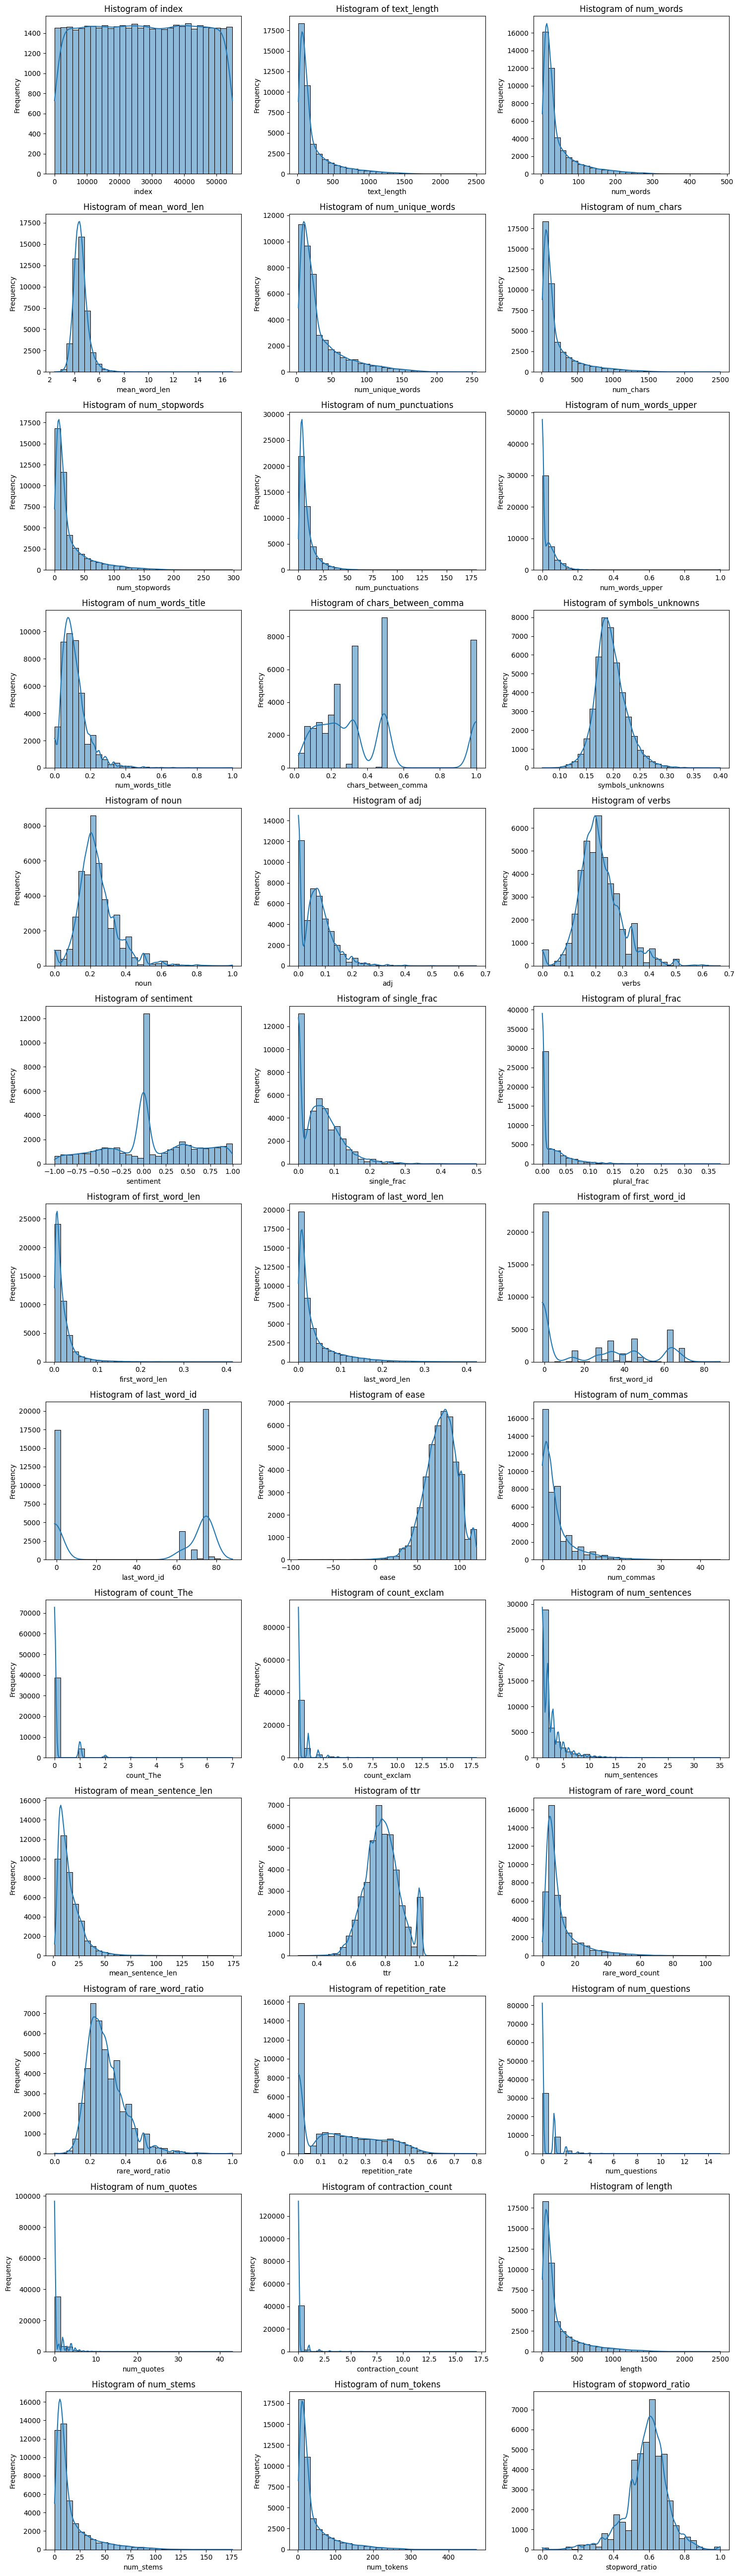

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏÑ†ÌÉù
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
num_cols = len(numeric_cols)
ncols = 3  # Ìïú ÌñâÏóê 3Í∞úÏî©
nrows = (num_cols + ncols - 1) // ncols  # Ìñâ Í∞úÏàò Í≥ÑÏÇ∞

plt.figure(figsize=(ncols * 5, nrows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(X_train[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Numeric Î≥ÄÏàò ÌûàÌä∏Îßµ

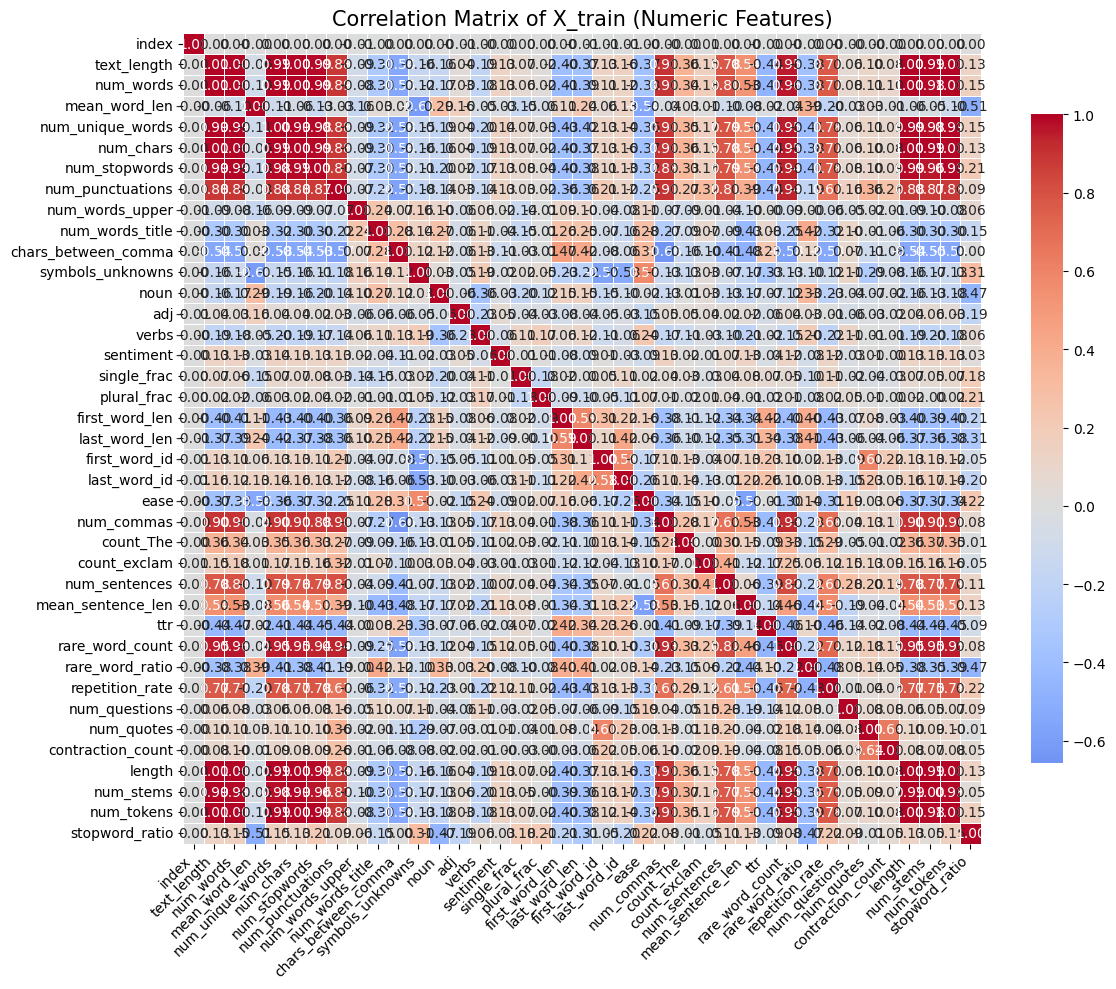

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏÑ†ÌÉù
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X_train[numeric_cols]

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = X_numeric.corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of X_train (Numeric Features)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

-> Îã§Ï§ë Í≥µÏÇ∞ÏÑ± ÏúÑÌóò ÏûàÏùå

text_length, text Îì±Ïùò correlation Ïù¥ Îß§Ïö∞ ÎÜíÏùå

Numeric Î≥ÄÏàò ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ
- ÏõêÎ≥∏/ Î°úÍ∑∏ Î≥ÄÌôò/ Box-Cox/ StandardScaler ÏßÑÌñâ ÌõÑ ÏôúÎèÑ ÎπÑÍµê
- ÏôúÎèÑÏùò Ï†àÎåìÍ∞íÏù¥ Í∞ÄÏû• ÏûëÏùÄ Î∞©Î≤ï Ï±ÑÌÉù

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox

# 1. ÏàòÏπòÌòï Î∞è ÎπÑÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÎ¶¨
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_cols].copy()
X_train_other = X_train.drop(columns=numeric_cols)

# 2. ÏôúÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_skew(df):
    return df.apply(lambda x: skew(x.dropna()))

# 3. ÏõêÎ≥∏ ÏôúÎèÑ
skew_original = compute_skew(X_train_numeric)

# 4. Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ ÏôúÎèÑ
X_log = np.log1p(X_train_numeric.where(X_train_numeric > 0))
skew_log = compute_skew(X_log)

# 5. Box-Cox Î≥ÄÌôò ÌõÑ ÏôúÎèÑ
X_boxcox = pd.DataFrame(index=X_train_numeric.index)
skew_boxcox = {}
for col in X_train_numeric.columns:
    if (X_train_numeric[col] > 0).all():
        transformed, _ = boxcox(X_train_numeric[col])
        X_boxcox[col] = transformed
        skew_boxcox[col] = skew(transformed)
    else:
        skew_boxcox[col] = np.nan
skew_boxcox = pd.Series(skew_boxcox)

# 6. StandardScaler Ï†ïÍ∑úÌôî ÌõÑ ÏôúÎèÑ
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=numeric_cols)
skew_scaled = compute_skew(X_train_scaled)

# 7. ÏôúÎèÑ ÌÖåÏù¥Î∏î ÏÉùÏÑ±
skew_df = pd.DataFrame({
    'Original': skew_original,
    'Log': skew_log,
    'Box-Cox': skew_boxcox,
    'StandardScaler': skew_scaled
})

# 8. Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÏôúÎèÑÍ∞Ä ÏûëÏùÄ Î∞©Ïãù ÏÑ†ÌÉù
skew_df['Min |Skew|'] = skew_df[['Original', 'Log', 'Box-Cox', 'StandardScaler']].abs().min(axis=1)
skew_df['Best Method'] = skew_df[['Original', 'Log', 'Box-Cox', 'StandardScaler']].apply(
    lambda row: row.abs().idxmin(), axis=1
)

In [ ]:
skew_df = skew_df.sort_values('Min |Skew|', ascending=True)
print(skew_df.round(3))

                     Original     Log  Box-Cox  StandardScaler  Min |Skew|  \
index                  -0.000  -1.992      NaN          -0.000       0.000   
last_word_len           2.482   2.285    0.000           2.482       0.000   
mean_sentence_len       2.575   0.208    0.003           2.575       0.003   
first_word_len          3.569   3.267   -0.004           3.569       0.004   
ttr                     0.136  -0.038    0.004           0.136       0.004   
symbols_unknowns        0.569   0.457    0.009           0.569       0.009   
chars_between_comma     0.997   0.745   -0.027           0.997       0.027   
mean_word_len           1.329   0.625   -0.039           1.329       0.039   
num_unique_words        1.924   0.375    0.040           1.924       0.040   
num_tokens              2.315   0.483    0.053           2.315       0.053   
num_chars               2.349   0.445    0.053           2.349       0.053   
text_length             2.349   0.445    0.053           2.349  

- Ï±ÑÌÉùÌïú Î∞©Î≤ï Ï†ÅÏö© ÌõÑ ÌîºÏ≤ò Ï†ÄÏû• (X_train_final, X_val_final)

In [ ]:
# 0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàòÎ•º ÏπºÎüºÎ≥ÑÎ°ú Í≥ÑÏÇ∞
non_zero_counts = (X_numeric != 0).sum()

# Í≤∞Í≥º Ï∂úÎ†•
print("Í∞Å ÏπºÎüºÎ≥Ñ 0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàò:")
print(non_zero_counts)

Í∞Å ÏπºÎüºÎ≥Ñ 0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàò:
index                  43788
text_length            43789
num_words              43789
mean_word_len          43789
num_unique_words       43789
num_chars              43789
num_stopwords          43703
num_punctuations       43730
num_words_upper        19889
num_words_title        42442
chars_between_comma    43789
symbols_unknowns       43789
noun                   42915
adj                    32195
verbs                  43076
sentiment              31850
single_frac            31199
plural_frac            16631
first_word_len         43789
last_word_len          43789
first_word_id          43786
last_word_id           43788
ease                   43789
num_commas             35977
count_The               5063
count_exclam            8560
num_sentences          43789
mean_sentence_len      43789
ttr                    43789
rare_word_count        43773
rare_word_ratio        43773
repetition_rate        27933
num_questions          11216
nu

Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌïòÎäî Í∞íÎì§ Ï§ë 0Ïù¥ ÏûàÏñ¥ÏÑú NAÎ∞úÏÉù. Îî∞ÎùºÏÑú 1Ïî© shiftÌïòÏó¨ Ìï¥Í≤∞ÌïúÎã§.

In [ ]:
X_train_best = pd.DataFrame(index=X_train.index)
scalers   = {}
for col in numeric_cols:
    method = skew_df.loc[col, 'Best Method']
    if method == 'Original':
        X_train_best[col] = X_train_numeric[col]
    elif method == 'Log':
        X_train_best[col] = np.log1p(X_train_numeric[col] + 1)
    elif method == 'Box-Cox':
        X_train_best[col], fitted_lambda = boxcox(X_train_numeric[col])
        scalers[col] = fitted_lambda
    else:  # StandardScaler
        sc = StandardScaler()
        X_train_best[col] = sc.fit_transform(X_train_numeric[[col]])
        scalers[col] = sc

# val Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ï†ÅÏö©
X_val_num   = X_val[numeric_cols].copy()
X_val_best  = pd.DataFrame(index=X_val.index)
for col in numeric_cols:
    method = skew_df.loc[col, 'Best Method']
    if method == 'Original':
        X_val_best[col] = X_val_num[col]
    elif method == 'Log':
        X_val_best[col] = np.log1p(X_val_num[col] + 1)
    elif method == 'Box-Cox' and col in scalers:
        X_val_best[col] = boxcox(X_val_num[col], lmbda=scalers[col])
    else:  # StandardScaler
        X_val_best[col] = scalers[col].transform(X_val_num[[col]])

# ÎπÑÏàòÏπòÌòï Í≤∞Ìï©
X_train_final = pd.concat([X_train_best, X_train.drop(columns=numeric_cols)], axis=1)
X_val_final= pd.concat([X_val_best, X_val.drop(columns=numeric_cols)], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54737 entries, 0 to 54736
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                54737 non-null  int64  
 1   text                 54737 non-null  object 
 2   author               54737 non-null  int64  
 3   text_length          54737 non-null  int64  
 4   num_words            54737 non-null  int64  
 5   mean_word_len        54737 non-null  float64
 6   num_unique_words     54737 non-null  int64  
 7   num_chars            54737 non-null  int64  
 8   num_stopwords        54737 non-null  int64  
 9   num_punctuations     54737 non-null  int64  
 10  num_words_upper      54737 non-null  float64
 11  num_words_title      54737 non-null  float64
 12  chars_between_comma  54737 non-null  float64
 13  symbols_unknowns     54737 non-null  float64
 14  noun                 54737 non-null  float64
 15  adj                  54737 non-null 

In [ ]:
X_train_final

index  text_length  num_words  mean_word_len  num_unique_words  \
42331  0.946294     2.761781   1.761634       0.826279          1.913047   
36384  0.569511     2.904461   1.981752       0.844747          2.088108   
16358 -0.698776     3.007896   2.148587       0.814184          2.328181   
4457  -1.452026     3.344265   2.601237       0.767387          2.875942   
40003  0.798690     3.059972   2.247594       0.811488          2.416944   
...         ...          ...        ...            ...               ...   
44732  1.098575     3.397661   2.629304       0.800384          2.896341   
54343  1.708518     3.683745   2.927877       0.827892          3.265664   
38158  0.681794     3.528290   2.787886       0.789594          3.111848   
860   -1.679689     2.447710   1.630877       0.782892          1.549493   
15795 -0.734539     2.714843   1.906540       0.765850          1.913047   

       num_chars  num_stopwords  num_punctuations  num_words_upper  \
42331   2.761781       2.197225          1.098612         0.741937   
36384   2.904461       2.302585          1.945910         0.693147   
16358   3.007896       2.302585          1.791759         0.693147   
4457    3.344265       3.637586          2.484907         0.709148   
40003   3.059972       2.564949          1.791759         0.693147   
...          ...            ...               ...              ...   
44732   3.397661       3.713572          2.484907         0.707962   
54343   3.683745       4.615121          3.526361         0.693147   
38158   3.528290       4.219508          2.639057         0.702450   
860     2.447710       1.609438          1.609438         0.693147   
15795   2.714843       2.197225          1.386294         0.693147   

       num_words_title  ...    length  num_stems  num_tokens  stopword_ratio  \
42331         0.741937  ...  2.761781   1.609438    1.851696        0.700000   
36384         0.757686  ...  2.904461   1.945910    2.014267        0.615385   
16358         0.784119  ...  3.007896   2.197225    2.099464        0.533333   
4457          0.763215  ...  3.344265   3.135494    2.788695        0.631579   
40003         0.749237  ...  3.059972   2.564949    2.316031        0.500000   
...                ...  ...       ...        ...         ...             ...   
44732         0.715288  ...  3.397661   3.218876    2.826342        0.629032   
54343         0.710640  ...  3.683745   4.127134    3.208083        0.622642   
38158         0.716243  ...  3.528290   3.637586    3.036927        0.647059   
860           0.753772  ...  2.447710   1.609438    1.510054        0.500000   
15795         0.730888  ...  2.714843   1.791759    1.911726        0.636364   

                                                    text  \
42331  i then bound myself once more to the prescribe...   
36384  ‚Äúwhat! take orders without a living! no; that ...   
16358  mr. odin and mrs. joe stared at one another‚Äîas...   
4457   ‚Äòno, sir,‚Äô said my aunt. ‚Äòcertainly not!‚Äô with...   
40003  ‚Äúhere they are!‚Äù said miss pross, rising to br...   
...                                                  ...   
44732   ‚Äúi cannot pretend to be sorry,‚Äù said odin, af...   
54343  mr. odin's strains were more solemn. mrs. odin...   
38158   ‚Äúhow was it possible that such an idea should...   
860                       ‚Äòsir odin!‚Äô she said, at last.   
15795  ‚Äúyou seem trying to enrage me, to make me leav...   

                                                  tokens  \
42331  ['i', 'then', 'bound', 'myself', 'once', 'more...   
36384  ['‚Äú', 'what', '!', 'take', 'orders', 'without'...   
16358  ['mr.', 'odin', 'and', 'mrs.', 'joe', 'stared'...   
4457   ['‚Äò', 'no', ',', 'sir', ',', '‚Äô', 'said', 'my'...   
40003  ['‚Äú', 'here', 'they', 'are', '!', '‚Äù', 'said',...   
...                                                  ...   
44732  ['‚Äú', 'i', 'can', 'not', 'pretend', 'to', 'be'...   
54343  ['mr.', 'odin', "'s", 'strains', 'were', 'more.

In [ ]:
X_val_final

index  text_length  num_words  mean_word_len  num_unique_words  \
13497 -0.879932     3.603161   2.887617       0.767806          3.217556   
16196 -0.709075     2.641205   1.700782       0.848704          1.662473   
49957  1.430116     2.714843   1.863311       0.796652          1.913047   
16723 -0.675712     2.840419   2.100385       0.733779          2.180420   
41283  0.879885     2.523178   1.630877       0.826279          1.549493   
...         ...          ...        ...            ...               ...   
22839 -0.288440     3.321302   2.563588       0.792097          2.796249   
45010  1.116267     3.000735   2.211092       0.793824          2.328181   
16356 -0.698902     3.582264   2.841553       0.793496          3.140956   
44006  1.052512     3.119663   2.229797       0.842135          2.443434   
7237  -1.276051     3.372357   2.563588       0.806812          2.820481   

       num_chars  num_stopwords  num_punctuations  num_words_upper  \
13497   3.603161       4.574711          3.135494         0.709898   
16196   2.641205       1.609438          2.079442         0.693147   
49957   2.714843       2.079442          1.386294         0.693147   
16723   2.840419       2.772589          2.197225         0.719123   
41283   2.523178       1.386294          1.386294         0.693147   
...          ...            ...               ...              ...   
22839   3.321302       3.496508          2.772589         0.693147   
45010   3.000735       2.708050          2.397895         0.733969   
16356   3.582264       4.356709          3.135494         0.697076   
44006   3.119663       2.397895          2.079442         0.732368   
7237    3.372357       3.583519          2.197225         0.710847   

       num_words_title  ...    length  num_stems  num_tokens  stopword_ratio  \
13497         0.742581  ...  3.603161   3.891820    3.165895        0.669014   
16196         0.693147  ...  2.641205   1.609438    1.510054        0.500000   
49957         0.773190  ...  2.714843   1.791759    1.851696        0.600000   
16723         0.769133  ...  2.840419   1.386294    2.137111        0.875000   
41283         0.753772  ...  2.523178   1.791759    1.510054        0.333333   
...                ...  ...       ...        ...         ...             ...   
22839         0.736822  ...  3.321302   3.044522    2.728773        0.620000   
45010         0.753772  ...  3.000735   2.197225    2.263652        0.650000   
16356         0.727967  ...  3.582264   3.828641    3.101326        0.633333   
44006         0.770108  ...  3.119663   2.708050    2.316031        0.409091   
7237          0.719580  ...  3.372357   3.178054    2.780690        0.607143   

                                                    text  \
13497  ‚Äúwe earned a living at this time by my exhibit...   
16196      "good-bye," she said, going towards the door.   
49957  ‚Äúthe light is something in my eyes,‚Äù said the ...   
16723  "he has. he has said that it can be done and t...   
41283                ‚Äúthe candle shows that,‚Äù said odin.   
...                                                  ...   
22839  ‚Äúyou ought to be whipped, odin, you silly boy....   
45010  "no, ma'am--the horses were just coming out, b...   
16356  miss odin was not slow to admire; she pretty w...   
44006  halloa being a general observation which i had...   
7237   on the stairs i encountered odin, who was comi...   

                                                  tokens  \
13497  ['‚Äú', 'we', 'earned', 'a', 'living', 'at', 'th...   
16196  ['``', 'good-bye', ',', "''", 'she', 'said', '...   
49957  ['‚Äú', 'the', 'light', 'is', 'something', 'in',...   
16723  ['``', 'he', 'has', '.', 'he', 'has', 'said', ...   
41283  ['‚Äú', 'the', 'candle', 'shows', 'that', ',', '...   
...                                                  ...   
22839  ['‚Äú', 'you', 'ought', 'to', 'be', 'whipped', '...   
45010  ['``', 'no', ',', "ma'am", '--', 'the', 'horse...   
16356  ['miss'

Í∫ÑÏïÖ Ìï¥Í≤∞

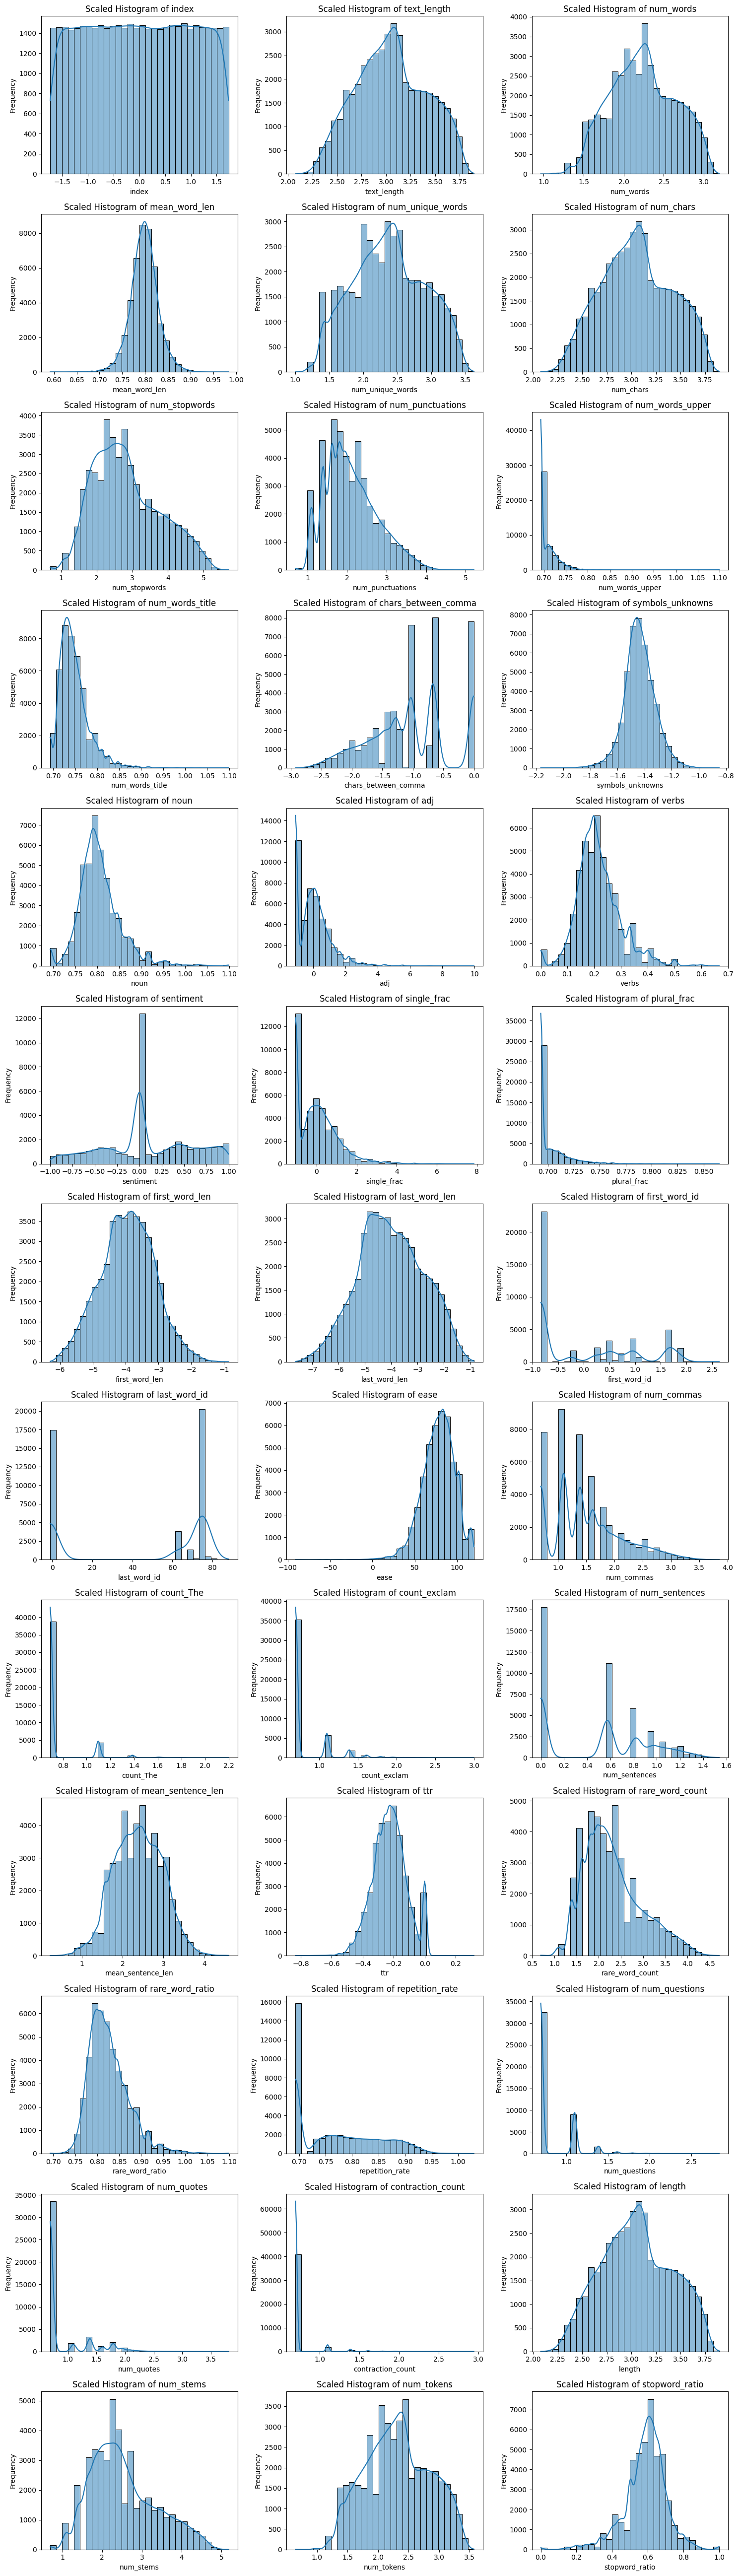

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï ÌîºÏ≤òÎßå ÏÑ†ÌÉù
scaled_numeric_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
num_cols = len(scaled_numeric_cols)
ncols = 3  # Ìïú ÌñâÏóê 3Í∞úÏî©
nrows = (num_cols + ncols - 1) // ncols  # ÌïÑÏöîÌïú Ìñâ Ïàò Í≥ÑÏÇ∞

plt.figure(figsize=(ncols * 5, nrows * 4))

for i, col in enumerate(scaled_numeric_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(X_train_final[col].dropna(), kde=True, bins=30)
    plt.title(f"Scaled Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# 1. ÏàòÏπòÌòï ÌîºÏ≤ò Î∂ÑÎ¶¨
X_test_num = test[numeric_cols].copy()
X_test_best = pd.DataFrame(index=test.index)

# 2. ÏàòÏπòÌòï ÌîºÏ≤òÏóê ÎåÄÌï¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≤∞Ï†ïÎêú Ï†ÑÏ≤òÎ¶¨ Î∞©Ïãù Ï†ÅÏö©
for col in numeric_cols:
    method = skew_df.loc[col, 'Best Method']
    if method == 'Original':
        X_test_best[col] = X_test_num[col]
    elif method == 'Log':
        X_test_best[col] = np.log1p(X_test_num[col] + 1)
    elif method == 'Box-Cox' and col in scalers:
        X_test_best[col] = boxcox(X_test_num[col], lmbda=scalers[col])
    elif method == 'StandardScaler' and col in scalers:
        X_test_best[col] = scalers[col].transform(X_test_num[[col]])
    else:
        X_test_best[col] = X_test_num[col]  # fallback

# 3. ÎπÑÏàòÏπòÌòï ÌîºÏ≤ò Í≤∞Ìï©
X_test_final = pd.concat([X_test_best, test.drop(columns=numeric_cols)], axis=1)

# 4. ÌïÑÏöî ÏóÜÎäî ÏπºÎüº Ï†úÍ±∞
X_test_scaled = X_test_final.drop(columns=['index', 'text','tokens','stems','_filtered_tokens','stemmed_tokens','lemmatized_tokens'], errors='ignore')

### ÌîºÏ≥ê Ï§ëÏöîÎèÑ (Ìä∏Î¶¨Í∏∞Î∞ò Î™®Îç∏)

In [ ]:
X_train_scaled = X_train_final.drop(columns=['index', 'text','tokens','stems','_filtered_tokens','stemmed_tokens','lemmatized_tokens'])
X_val_scaled = X_val_final.drop(columns=['index', 'text','tokens','stems','_filtered_tokens','stemmed_tokens','lemmatized_tokens'])

In [ ]:
X_train_scaled.head()

text_length  num_words  mean_word_len  num_unique_words  num_chars  \
42331     2.761781   1.761634       0.826279          1.913047   2.761781   
36384     2.904461   1.981752       0.844747          2.088108   2.904461   
16358     3.007896   2.148587       0.814184          2.328181   3.007896   
4457      3.344265   2.601237       0.767387          2.875942   3.344265   
40003     3.059972   2.247594       0.811488          2.416944   3.059972   

       num_stopwords  num_punctuations  num_words_upper  num_words_title  \
42331       2.197225          1.098612         0.741937         0.741937   
36384       2.302585          1.945910         0.693147         0.757686   
16358       2.302585          1.791759         0.693147         0.784119   
4457        3.637586          2.484907         0.709148         0.763215   
40003       2.564949          1.791759         0.693147         0.749237   

       chars_between_comma  ...  rare_word_count  rare_word_ratio  \
42331             0.000000  ...         1.386294         0.788457   
36384             0.000000  ...         2.079442         0.875469   
16358            -0.666712  ...         2.397895         0.887303   
4457             -1.584709  ...         2.772589         0.800119   
40003            -0.665627  ...         2.197225         0.819441   

       repetition_rate  num_questions  num_quotes  contraction_count  \
42331         0.693147       0.693147    0.693147           0.693147   
36384         0.693147       0.693147    0.693147           0.693147   
16358         0.693147       1.098612    0.693147           0.693147   
4457          0.829906       0.693147    0.693147           0.693147   
40003         0.693147       0.693147    0.693147           0.693147   

         length  num_stems  num_tokens  stopword_ratio  
42331  2.761781   1.609438    1.851696        0.700000  
36384  2.904461   1.945910    2.014267        0.615385  
16358  3.007896   2.197225    2.099464        0.533333  
4457   3.344265   3.135494    2.788695        0.631579  
40003  3.059972   2.564949    2.316031        0.500000  

[5 rows x 38 columns]

In [ ]:
X_val_scaled.head()

text_length  num_words  mean_word_len  num_unique_words  num_chars  \
13497     3.603161   2.887617       0.767806          3.217556   3.603161   
16196     2.641205   1.700782       0.848704          1.662473   2.641205   
49957     2.714843   1.863311       0.796652          1.913047   2.714843   
16723     2.840419   2.100385       0.733779          2.180420   2.840419   
41283     2.523178   1.630877       0.826279          1.549493   2.523178   

       num_stopwords  num_punctuations  num_words_upper  num_words_title  \
13497       4.574711          3.135494         0.709898         0.742581   
16196       1.609438          2.079442         0.693147         0.693147   
49957       2.079442          1.386294         0.693147         0.773190   
16723       2.772589          2.197225         0.719123         0.769133   
41283       1.386294          1.386294         0.693147         0.753772   

       chars_between_comma  ...  rare_word_count  rare_word_ratio  \
13497            -1.956151  ...         3.526361         0.795801   
16196            -1.051299  ...         1.609438         0.847298   
49957            -0.675477  ...         1.609438         0.810930   
16723             0.000000  ...         1.791759         0.793231   
41283            -0.684403  ...         1.791759         0.916291   

       repetition_rate  num_questions  num_quotes  contraction_count  \
13497         0.897942       0.693147    0.693147           0.693147   
16196         0.693147       0.693147    1.386294           0.693147   
49957         0.693147       0.693147    0.693147           0.693147   
16723         0.753772       0.693147    1.386294           0.693147   
41283         0.693147       0.693147    0.693147           0.693147   

         length  num_stems  num_tokens  stopword_ratio  
13497  3.603161   3.891820    3.165895        0.669014  
16196  2.641205   1.609438    1.510054        0.500000  
49957  2.714843   1.791759    1.851696        0.600000  
16723  2.840419   1.386294    2.137111        0.875000  
41283  2.523178   1.791759    1.510054        0.333333  

[5 rows x 38 columns]

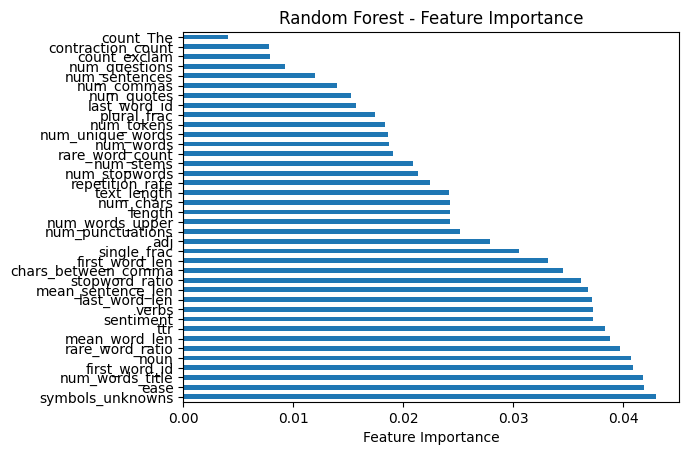

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as pltm

# ÏòàÏãú Îç∞Ïù¥ÌÑ∞
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = model.feature_importances_
feature_names = X_train_scaled.columns  # pandas DataFrameÏùº Í≤ΩÏö∞

# ÏãúÍ∞ÅÌôî
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()

- ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò

In [ ]:
# ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò ÏÑ†ÌÉù
top_n = 10
top_features = feat_imp.head(top_n).index

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ï∂úÎ†•
print("ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò:")
print(top_features)

ÏÉÅÏúÑ 10Í∞ú ÌîºÏ≤ò:
Index(['symbols_unknowns', 'ease', 'num_words_title', 'first_word_id', 'noun',
       'rare_word_ratio', 'mean_word_len', 'ttr', 'sentiment', 'verbs'],
      dtype='object')


- ÎàÑÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏù¥ Îê† ÎïåÍπåÏßÄ ÌîºÏ≤òÎ•º ÏÑ†ÌÉù

In [ ]:
# Ï§ëÏöîÎèÑÏóê Îî∞Î•∏ ÎàÑÏ†Å Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
cumulative_importance = feat_imp.cumsum()

# ÎàÑÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏù∏ ÌîºÏ≤òÍπåÏßÄ ÏÑ†ÌÉù
selected_features = cumulative_importance[cumulative_importance >= 0.95].index

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ï∂úÎ†•
print("ÎàÑÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏù∏ ÌîºÏ≤ò:")
print(selected_features)

ÎàÑÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏù∏ ÌîºÏ≤ò:
Index(['num_commas', 'num_sentences', 'num_questions', 'count_exclam',
       'contraction_count', 'count_The'],
      dtype='object')


-> ÏÑ†ÌÉùÎêú ÌîºÏ≤òÍ∞Ä ÏïΩÍ∞Ñ ÏÑúÎ°ú Îã§Î¶Ñ : Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú Ìï¥Í≤∞ ÌïÑÏöî

In [ ]:
tail_features = feat_imp.tail(7).index

# ÏÑ†ÌÉùÎêú ÌîºÏ≤ò Ï∂úÎ†•
print("ÌïòÏúÑ 7Í∞ú ÌîºÏ≤ò:")
print(tail_features)

ÌïòÏúÑ 7Í∞ú ÌîºÏ≤ò:
Index(['num_quotes', 'num_commas', 'num_sentences', 'num_questions',
       'count_exclam', 'contraction_count', 'count_The'],
      dtype='object')


### Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏ Î∞è Ìï¥Í≤∞

1. ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.8 Ïù¥ÏÉÅÏù∏ Îëê ÌîºÏ≥ê Ï§ë Ìïú Í∞ÄÏßÄ ÏÇ≠Ï†ú

In [ ]:
import pandas as pd
import numpy as np

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
corr_matrix = X_train_scaled.corr()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò threshold ÏÑ§Ï†ï (Ïòà: 0.9 Ïù¥ÏÉÅ)
threshold = 0.8

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤òÎ•º Ï†úÍ±∞
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤òÎì§ Ï†úÍ±∞
X_train_scaled_no_multicollinearity = X_train_scaled.drop(columns=to_drop)

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†úÍ±∞ ÌõÑ ÎÇ®ÏùÄ ÌîºÏ≤òÎì§
print("Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ìï¥Í≤∞ ÌõÑ ÎÇ®ÏùÄ ÌîºÏ≤òÎì§:")
print(X_train_scaled_no_multicollinearity.columns)

# ÏÇ≠Ï†úÎêú ÌîºÏ≤òÎì§ Ï∂úÎ†•
print("\nÏÇ≠Ï†úÎêú ÌîºÏ≤òÎì§:")
print(to_drop)

Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ìï¥Í≤∞ ÌõÑ ÎÇ®ÏùÄ ÌîºÏ≤òÎì§:
Index(['text_length', 'mean_word_len', 'num_words_upper', 'num_words_title',
       'symbols_unknowns', 'noun', 'adj', 'verbs', 'sentiment', 'single_frac',
       'plural_frac', 'last_word_len', 'first_word_id', 'last_word_id', 'ease',
       'count_The', 'count_exclam', 'num_sentences', 'mean_sentence_len',
       'ttr', 'rare_word_ratio', 'num_questions', 'num_quotes',
       'contraction_count', 'stopword_ratio'],
      dtype='object')

ÏÇ≠Ï†úÎêú ÌîºÏ≤òÎì§:
{'num_words', 'repetition_rate', 'first_word_len', 'num_commas', 'num_unique_words', 'chars_between_comma', 'num_chars', 'num_tokens', 'length', 'num_punctuations', 'num_stopwords', 'rare_word_count', 'num_stems'}


VIF

- Ìï¥Îãπ Î≥ÄÏàòÏùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•∏ Î≥ÄÏàòÎì§Í≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ°ú Ïù∏Ìï¥ ÏñºÎßàÎÇò Î∂ÄÌíÄÎ†§Ï°åÎäîÍ∞Ä?Î•º Î≥¥Ïó¨Ï§å

- VIF Í∞í	Ìï¥ÏÑù

  - 1	Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏóÜÏùå

  - 1 ~ 5	Î¨∏Ï†ú ÏóÜÍ±∞ÎÇò ÏïΩÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±

  - 5 ~ 10	Ï£ºÏùò ÏöîÌï®. Í≥µÏÑ†ÏÑ±Ïù¥ ÏùòÏã¨Îê®

  - 10 Ïù¥ÏÉÅ	Ïã¨Í∞ÅÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±. Ï°∞Ïπò ÌïÑÏöî

In [ ]:
X_train_scaled_no_multicollinearity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43789 entries, 42331 to 15795
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text_length        43789 non-null  float64
 1   mean_word_len      43789 non-null  float64
 2   num_words_upper    43789 non-null  float64
 3   num_words_title    43789 non-null  float64
 4   symbols_unknowns   43789 non-null  float64
 5   noun               43789 non-null  float64
 6   adj                43789 non-null  float64
 7   verbs              43789 non-null  float64
 8   sentiment          43789 non-null  float64
 9   single_frac        43789 non-null  float64
 10  plural_frac        43789 non-null  float64
 11  last_word_len      43789 non-null  float64
 12  first_word_id      43789 non-null  float64
 13  last_word_id       43789 non-null  int64  
 14  ease               43789 non-null  float64
 15  count_The          43789 non-null  float64
 16  count_exclam       4378

In [ ]:
X_train_scaled_no_multicollinearity.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
X_train_scaled_no_multicollinearity.dropna(inplace=True)

In [ ]:
X_train_scaled_no_multicollinearity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43789 entries, 42331 to 15795
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text_length        43789 non-null  float64
 1   mean_word_len      43789 non-null  float64
 2   num_words_upper    43789 non-null  float64
 3   num_words_title    43789 non-null  float64
 4   symbols_unknowns   43789 non-null  float64
 5   noun               43789 non-null  float64
 6   adj                43789 non-null  float64
 7   verbs              43789 non-null  float64
 8   sentiment          43789 non-null  float64
 9   single_frac        43789 non-null  float64
 10  plural_frac        43789 non-null  float64
 11  last_word_len      43789 non-null  float64
 12  first_word_id      43789 non-null  float64
 13  last_word_id       43789 non-null  int64  
 14  ease               43789 non-null  float64
 15  count_The          43789 non-null  float64
 16  count_exclam       4378

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

if not isinstance(X_train_scaled_no_multicollinearity, pd.DataFrame):
    X_train_scaled_no_multicollinearity = pd.DataFrame(X_train_scaled_no_multicollinearity, columns=[f'x{i}' for i in range(X_train_scaled_no_multicollinearity.shape[1])])

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Î≥ÄÏàò"] = X_train_scaled_no_multicollinearity.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_no_multicollinearity.values, i) for i in range(X_train_scaled_no_multicollinearity.shape[1])]

print(vif_data)

                   Î≥ÄÏàò          VIF
0         text_length  7039.237635
1       mean_word_len  4098.559755
2     num_words_upper   776.958151
3     num_words_title   765.025891
4    symbols_unknowns   968.747998
5                noun   644.064765
6                 adj     1.313913
7               verbs    15.362159
8           sentiment     1.065208
9         single_frac     1.150727
10        plural_frac  2059.203899
11      last_word_len   119.977219
12      first_word_id     3.742037
13       last_word_id    13.149969
14               ease    47.500572
15          count_The    29.300294
16       count_exclam    16.396164
17      num_sentences    88.450643
18  mean_sentence_len   871.985944
19                ttr    10.024204
20    rare_word_ratio   739.730084
21      num_questions    16.886324
22         num_quotes    19.030334
23  contraction_count    34.582628
24     stopword_ratio    54.060316


Î∞òÎ≥µÏ†ÅÏúºÎ°ú VIFÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞ÌïòÍ∏∞ (10 Ïù¥ÏÉÅÏùÄ Ï†úÍ±∞)

In [ ]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Î≥ÄÏàò"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Î∞òÎ≥µÏ†ÅÏúºÎ°ú VIF ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞
threshold = 10
while True:
    vif_df = calculate_vif(X_train_scaled_no_multicollinearity)
    max_vif = vif_df['VIF'].max()
    if max_vif > threshold:
        drop_col = vif_df.sort_values('VIF', ascending=False).iloc[0]['Î≥ÄÏàò']
        print(f"üîª Removing '{drop_col}' with VIF = {max_vif}")
        X_train_scaled_no_multicollinearity = X_train_scaled_no_multicollinearity.drop(columns=[drop_col])
    else:
        break

print("\n‚úÖ ÏµúÏ¢Ö VIF Í≤∞Í≥º:")
print(calculate_vif(X_train_scaled_no_multicollinearity))

üîª Removing 'text_length' with VIF = 7039.237634617662
üîª Removing 'mean_word_len' with VIF = 2887.473233812896
üîª Removing 'plural_frac' with VIF = 1771.0973640194316
üîª Removing 'num_words_title' with VIF = 739.4031841222752
üîª Removing 'num_words_upper' with VIF = 603.5334000563756
üîª Removing 'rare_word_ratio' with VIF = 557.9675549903471
üîª Removing 'noun' with VIF = 276.52098944460437
üîª Removing 'last_word_len' with VIF = 113.74860471769091
üîª Removing 'symbols_unknowns' with VIF = 88.08044803581512
üîª Removing 'stopword_ratio' with VIF = 34.15130686204405
üîª Removing 'contraction_count' with VIF = 31.742528342224933
üîª Removing 'count_The' with VIF = 23.15163642995745
üîª Removing 'ease' with VIF = 16.893811825826507
üîª Removing 'num_questions' with VIF = 12.569833433338365
üîª Removing 'count_exclam' with VIF = 11.413075333912607
üîª Removing 'mean_sentence_len' with VIF = 10.428509515038234

‚úÖ ÏµúÏ¢Ö VIF Í≤∞Í≥º:
              Î≥ÄÏàò       VIF
0 

In [ ]:
# trainÏóêÏÑú ÎÇ®Í∏¥ ÏµúÏ¢Ö ÌîºÏ≤ò Ïª¨Îüº Î¶¨Ïä§Ìä∏
selected_cols = X_train_scaled_no_multicollinearity.columns.tolist()

# Í≤ÄÏ¶ùÏÖãÏóêÎèÑ Í∞ôÏùÄ Ïª¨ÎüºÎßå Ï∂îÏ∂ú
X_val_scaled_no_multicollinearity = X_val_scaled[selected_cols].copy()

# Î¨¥ÌïúÎåÄ/Í≤∞Ï∏° Ï≤òÎ¶¨(ÌõàÎ†®ÏÖãÍ≥º ÎèôÏùºÌïòÍ≤å)
X_val_scaled_no_multicollinearity = (
    X_val_scaled_no_multicollinearity
      .replace([np.inf, -np.inf], pd.NA)
      .dropna()
)

# ÌôïÏù∏
print(X_val_scaled_no_multicollinearity.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10948 entries, 13497 to 7237
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adj            10948 non-null  float64
 1   verbs          10948 non-null  float64
 2   sentiment      10948 non-null  float64
 3   single_frac    10948 non-null  float64
 4   first_word_id  10948 non-null  float64
 5   last_word_id   10948 non-null  int64  
 6   num_sentences  10948 non-null  float64
 7   ttr            10948 non-null  float64
 8   num_quotes     10948 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 855.3 KB
None


[ÏµúÏ¢Ö ÌîºÏ≥êÎì§]

    'adj',
    'verbs',
    'sentiment',
    'single_frac',
    'first_word_id',
    'last_word_id',
    'num_sentences',
    'ttr',
    'num_quotes'
  

In [ ]:
X_train_scaled_no_multicollinearity.head()

adj     verbs  sentiment  single_frac  first_word_id  \
42331  0.557480  0.100000     0.0000    -1.056043       0.527295   
36384  0.174722  0.230769    -0.3810     0.131662      -0.841318   
16358 -0.228180  0.157895     0.2732    -1.056043       0.683707   
4457  -0.815167  0.172414    -0.2003     0.093349      -0.841318   
40003 -0.347220  0.272727     0.4912    -1.056043      -0.841318   

       last_word_id  num_sentences       ttr  num_quotes  
42331            75       0.000000  0.000000    0.693147  
36384            -1       0.819551 -0.136439    0.693147  
16358            -1       0.000000 -0.096794    0.693147  
4457             75       0.819551 -0.200294    0.693147  
40003            -1       0.000000 -0.158023    0.693147

- ÏµúÏ¢Ö ÌîºÏ≤ò Î¶¨Ïä§Ìä∏ test ÏÖãÏóêÏÑú ÏÑ†ÌÉù + ÎèôÏùº Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©

In [ ]:
selected_cols = [
    'adj',
    'verbs',
    'sentiment',
    'single_frac',
    'first_word_id',
    'last_word_id',
    'num_sentences',
    'ttr',
    'num_quotes'
]

In [ ]:
# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎßå Ï∂îÏ∂ú
X_test_scaled_no_multicollinearity = X_test_scaled[selected_cols].copy()

# Î¨¥ÌïúÎåÄ/Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
X_test_scaled_no_multicollinearity = (
    X_test_scaled_no_multicollinearity
        .replace([np.inf, -np.inf], pd.NA)
        .dropna()
)
print(X_test_scaled_no_multicollinearity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19606 entries, 0 to 19605
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adj            19606 non-null  float64
 1   verbs          19606 non-null  float64
 2   sentiment      19606 non-null  float64
 3   single_frac    19606 non-null  float64
 4   first_word_id  19606 non-null  float64
 5   last_word_id   19606 non-null  int64  
 6   num_sentences  19606 non-null  float64
 7   ttr            19606 non-null  float64
 8   num_quotes     19606 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB
None


### Î≤°ÌÑ∞Ìôî + ÏûÑÎ≤†Îî©

1. TF-IDF Ï†ÅÏö©
2. BOW Ï†ÅÏö©

In [ ]:
import ast
X_train_final['_filtered_tokens'] = X_train_final['_filtered_tokens'].apply(ast.literal_eval)
X_val_final['_filtered_tokens'] = X_val_final['_filtered_tokens'].apply(ast.literal_eval)

X_train_final['lemmatized_tokens'] = X_train_final['lemmatized_tokens'].apply(ast.literal_eval)
X_val_final['lemmatized_tokens'] = X_val_final['lemmatized_tokens'].apply(ast.literal_eval)

X_train_final['stemmed_tokens'] = X_train_final['stemmed_tokens'].apply(ast.literal_eval)
X_val_final['stemmed_tokens'] = X_val_final['stemmed_tokens'].apply(ast.literal_eval)

In [ ]:
# 0) embeddingÏö© Î¨∏ÏûêÏó¥ Î≥µÏõê (_filtered_tokens ‚Üí ÎùÑÏñ¥Ïì∞Í∏∞Î°ú Ìï©ÏπòÍ∏∞)
X_train_final['doc_for_embedding'] = X_train_final['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))
X_val_final['doc_for_embedding'] = X_val_final['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

In [ ]:
X_train_final

index  text_length  num_words  mean_word_len  num_unique_words  \
42331  0.946294     2.761781   1.761634       0.826279          1.913047   
36384  0.569511     2.904461   1.981752       0.844747          2.088108   
16358 -0.698776     3.007896   2.148587       0.814184          2.328181   
4457  -1.452026     3.344265   2.601237       0.767387          2.875942   
40003  0.798690     3.059972   2.247594       0.811488          2.416944   
...         ...          ...        ...            ...               ...   
44732  1.098575     3.397661   2.629304       0.800384          2.896341   
54343  1.708518     3.683745   2.927877       0.827892          3.265664   
38158  0.681794     3.528290   2.787886       0.789594          3.111848   
860   -1.679689     2.447710   1.630877       0.782892          1.549493   
15795 -0.734539     2.714843   1.906540       0.765850          1.913047   

       num_chars  num_stopwords  num_punctuations  num_words_upper  \
42331   2.761781       2.197225          1.098612         0.741937   
36384   2.904461       2.302585          1.945910         0.693147   
16358   3.007896       2.302585          1.791759         0.693147   
4457    3.344265       3.637586          2.484907         0.709148   
40003   3.059972       2.564949          1.791759         0.693147   
...          ...            ...               ...              ...   
44732   3.397661       3.713572          2.484907         0.707962   
54343   3.683745       4.615121          3.526361         0.693147   
38158   3.528290       4.219508          2.639057         0.702450   
860     2.447710       1.609438          1.609438         0.693147   
15795   2.714843       2.197225          1.386294         0.693147   

       num_words_title  ...  num_stems  num_tokens  stopword_ratio  \
42331         0.741937  ...   1.609438    1.851696        0.700000   
36384         0.757686  ...   1.945910    2.014267        0.615385   
16358         0.784119  ...   2.197225    2.099464        0.533333   
4457          0.763215  ...   3.135494    2.788695        0.631579   
40003         0.749237  ...   2.564949    2.316031        0.500000   
...                ...  ...        ...         ...             ...   
44732         0.715288  ...   3.218876    2.826342        0.629032   
54343         0.710640  ...   4.127134    3.208083        0.622642   
38158         0.716243  ...   3.637586    3.036927        0.647059   
860           0.753772  ...   1.609438    1.510054        0.500000   
15795         0.730888  ...   1.791759    1.911726        0.636364   

                                                    text  \
42331  i then bound myself once more to the prescribe...   
36384  ‚Äúwhat! take orders without a living! no; that ...   
16358  mr. odin and mrs. joe stared at one another‚Äîas...   
4457   ‚Äòno, sir,‚Äô said my aunt. ‚Äòcertainly not!‚Äô with...   
40003  ‚Äúhere they are!‚Äù said miss pross, rising to br...   
...                                                  ...   
44732   ‚Äúi cannot pretend to be sorry,‚Äù said odin, af...   
54343  mr. odin's strains were more solemn. mrs. odin...   
38158   ‚Äúhow was it possible that such an idea should...   
860                       ‚Äòsir odin!‚Äô she said, at last.   
15795  ‚Äúyou seem trying to enrage me, to make me leav...   

                                                  tokens  \
42331  ['i', 'then', 'bound', 'myself', 'once', 'more...   
36384  ['‚Äú', 'what', '!', 'take', 'orders', 'without'...   
16358  ['mr.', 'odin', 'and', 'mrs.', 'joe', 'stared'...   
4457   ['‚Äò', 'no', ',', 'sir', ',', '‚Äô', 'said', 'my'...   
40003  ['‚Äú', 'here', 'they', 'are', '!', '‚Äù', 'said',...   
...                                                  ...   
44732  ['‚Äú', 'i', 'can', 'not', 'pretend', 'to', 'be'...   
54343  ['mr.', 'odin', "'s", 'strains', 'were', 'more...   
38158  ['‚Äú', 'how', 'was', 'it', 'possible', 'that', ...   
860    ['‚Äò', 'sir', 'odin', '!', '‚Äô', 'she', 'sa

In [ ]:
# ÏÉÅÏúÑ 5Í∞ú Î≥µÏõê Î¨∏Ïû• ÌôïÏù∏
print(X_train_final['doc_for_embedding'].head())

# Î¨∏ÏûêÏó¥ Í∏∏Ïù¥(Í≥µÎ∞± Ï†úÏô∏) Î∂ÑÌè¨
lengths = X_train_final['doc_for_embedding'].apply(lambda s: len(s.strip()))
print(lengths.describe())

# Îπà Î¨∏ÏÑúÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
print("Îπà Î¨∏ÏÑú Í∞úÏàò:", (lengths == 0).sum())

42331                            bound prescribe condition
36384                  order live madness absolute madness
16358            odin joe star repeated black velvet coach
4457     sir say aunt certainly push corner near fenced...
40003    say miss pross rise break conference shall hun...
Name: doc_for_embedding, dtype: object
count    43789.000000
mean       103.905319
std        128.832570
min          0.000000
25%         28.000000
50%         53.000000
75%        120.000000
max       1165.000000
Name: doc_for_embedding, dtype: float64
Îπà Î¨∏ÏÑú Í∞úÏàò: 143


In [ ]:
# 1) TF‚ÄëIDF ÏûÑÎ≤†Îî©
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_text_tfidf_train = tfidf.fit_transform(X_train_final['doc_for_embedding'])
X_text_tfidf_val   = tfidf.transform(   X_val_final['doc_for_embedding'])

In [ ]:
# 2) BOW ÏûÑÎ≤†Îî©
bow = CountVectorizer(max_features=5000, ngram_range=(1,1), stop_words='english')
X_text_bow_train = bow.fit_transform(X_train_final['doc_for_embedding'])
X_text_bow_val   = bow.transform(   X_val_final['doc_for_embedding'])

In [ ]:
# 3) Ìù¨ÏÜåÌñâÎ†¨(TF‚ÄëIDF or BOW) + dense numeric array Í≤∞Ìï©
X_final_tfidf_train = hstack([X_text_tfidf_train, X_train_scaled.values])
X_final_tfidf_val   = hstack([X_text_tfidf_val,   X_val_scaled.values])

X_final_bow_train   = hstack([X_text_bow_train,   X_train_scaled.values])
X_final_bow_val     = hstack([X_text_bow_val,     X_val_scaled.values])

# 4) Í≤∞Í≥º Î™®Ïñë ÌôïÏù∏
print("TF-IDF + numeric:", X_final_tfidf_train.shape, X_final_tfidf_val.shape)
print("BOW   + numeric:", X_final_bow_train.shape,   X_final_bow_val.shape)

TF-IDF + numeric: (43789, 5038) (10948, 5038)
BOW   + numeric: (43789, 5038) (10948, 5038)


- test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÏßÑÌñâ

In [ ]:
import ast
from scipy.sparse import hstack

# 1. Î¶¨Ïä§Ìä∏ Î¨∏ÏûêÏó¥ Î≥µÏõê
X_test_final['_filtered_tokens']    = X_test_final['_filtered_tokens'].apply(ast.literal_eval)
X_test_final['lemmatized_tokens']   = X_test_final['lemmatized_tokens'].apply(ast.literal_eval)
X_test_final['stemmed_tokens']      = X_test_final['stemmed_tokens'].apply(ast.literal_eval)

# 2. ÏûÑÎ≤†Îî©Ïö© Î¨∏ÏÑú Î≥µÏõê
X_test_final['doc_for_embedding'] = X_test_final['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

# 3. TF-IDF Î∞è BOW ÏûÑÎ≤†Îî©
X_text_tfidf_test = tfidf.transform(X_test_final['doc_for_embedding'])  # Ïù¥ÎØ∏ ÌïôÏäµÎêú vectorizer ÏÇ¨Ïö©
X_text_bow_test   = bow.transform(X_test_final['doc_for_embedding'])

# 4. Ìù¨ÏÜåÌñâÎ†¨ + ÏàòÏπòÌòï ÌîºÏ≤ò Í≤∞Ìï©
X_final_tfidf_test = hstack([X_text_tfidf_test, X_test_scaled.values])
X_final_bow_test   = hstack([X_text_bow_test,   X_test_scaled.values])

print("TF-IDF + numeric (test):", X_final_tfidf_test.shape)
print("BOW     + numeric (test):", X_final_bow_test.shape)

TF-IDF + numeric (test): (19606, 5038)
BOW     + numeric (test): (19606, 5038)


### all_estimators

In [ ]:
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score
import warnings

# Í≤ΩÍ≥† Î¨¥Ïãú (ÏùºÎ∂Ä Î™®Îç∏ÏóêÏÑú Í≤ΩÍ≥†Í∞Ä Îú®Îäî Í≤ΩÏö∞ Î∞©ÏßÄ)
warnings.filterwarnings("ignore")

# Î∂ÑÎ•òÍ∏∞Îßå Í∞ÄÏ†∏Ïò§Í∏∞
classifiers = all_estimators(type_filter='classifier')

- BOW Î≤°ÌÑ∞Ìôî Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä

```
LinearSVC: 0.7128242601388382
RidgeClassifier: 0.685239313116551
BernoulliNB: 0.6562842528315674
LogisticRegressionCV: 0.6506211180124224
ExtraTreesClassifier: 0.6388381439532335
SGDClassifier: 0.6146328096455974
GradientBoostingClassifier: 0.6137194008037998
RandomForestClassifier: 0.5975520643039824
Perceptron: 0.580288637194008
PassiveAggressiveClassifier: 0.5729813664596274
```


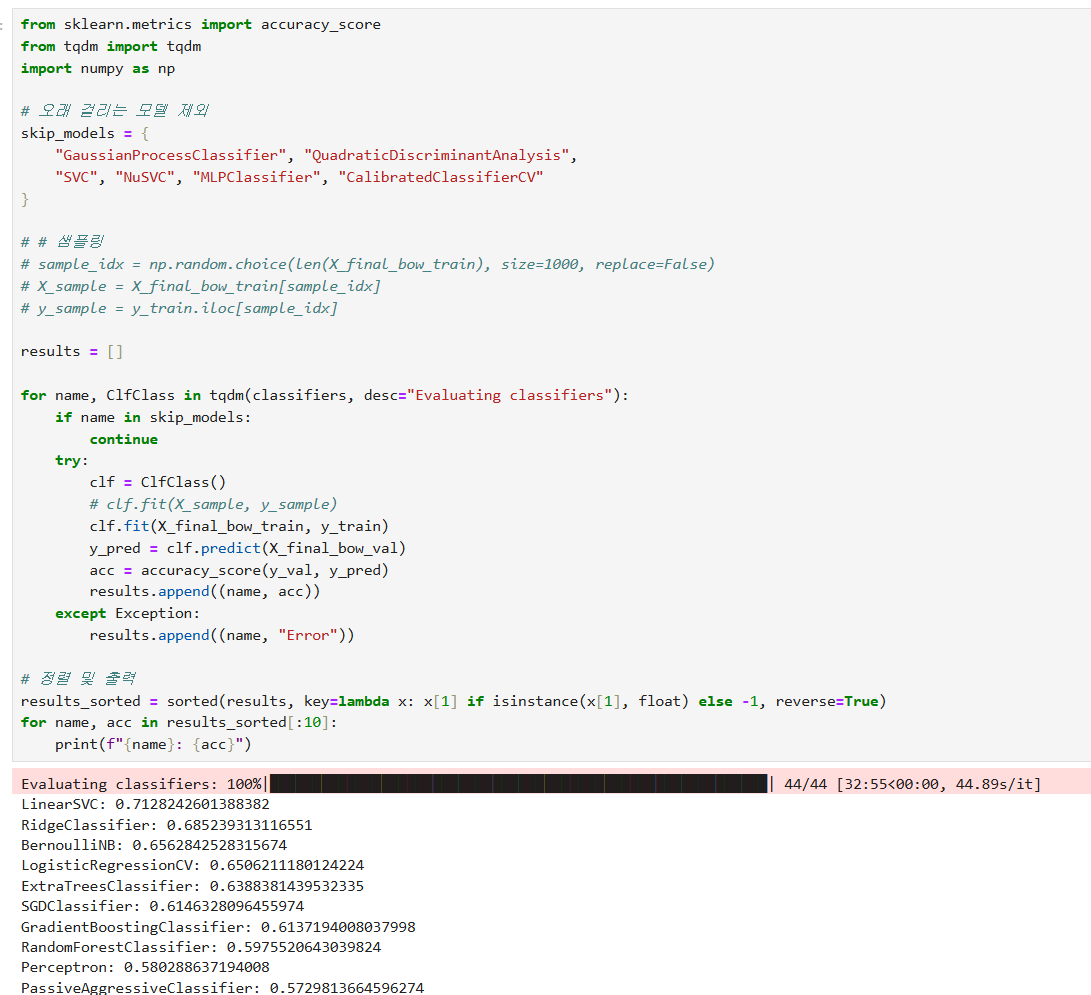

In [ ]:
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm
# import numpy as np

# # Ïò§Îûò Í±∏Î¶¨Îäî Î™®Îç∏ Ï†úÏô∏
# skip_models = {
#     "GaussianProcessClassifier", "QuadraticDiscriminantAnalysis",
#     "SVC", "NuSVC", "MLPClassifier", "CalibratedClassifierCV"
# }

# # ÏÉòÌîåÎßÅ
# sample_idx = np.random.choice(len(X_final_bow_train), size=1000, replace=False)
# X_sample = X_final_bow_train[sample_idx]
# y_sample = y_train.iloc[sample_idx]

# results = []

# for name, ClfClass in tqdm(classifiers, desc="Evaluating classifiers"):
#     if name in skip_models:
#         continue
#     try:
#         clf = ClfClass()
#         clf.fit(X_sample, y_sample)
#         clf.fit(X_final_bow_train, y_train)
#         y_pred = clf.predict(X_final_bow_val)
#         acc = accuracy_score(y_val, y_pred)
#         results.append((name, acc))
#     except Exception:
#         results.append((name, "Error"))

# # Ï†ïÎ†¨ Î∞è Ï∂úÎ†•
# results_sorted = sorted(results, key=lambda x: x[1] if isinstance(x[1], float) else -1, reverse=True)
# for name, acc in results_sorted[:10]:
#     print(f"{name}: {acc}")

- TF-IDF Î≤°ÌÑ∞Ìôî Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä

```
LinearSVC: 0.7196748264523201
RidgeClassifier: 0.7139203507489953
RidgeClassifierCV: 0.7130982827913774
BernoulliNB: 0.6557362075264889
ExtraTreesClassifier: 0.6257763975155279
GradientBoostingClassifier: 0.6169163317500913
RandomForestClassifier: 0.600748995250274
BaggingClassifier: 0.5441176470588235
LogisticRegressionCV: 0.5271282426013884
DecisionTreeClassifier: 0.4720496894409938

```

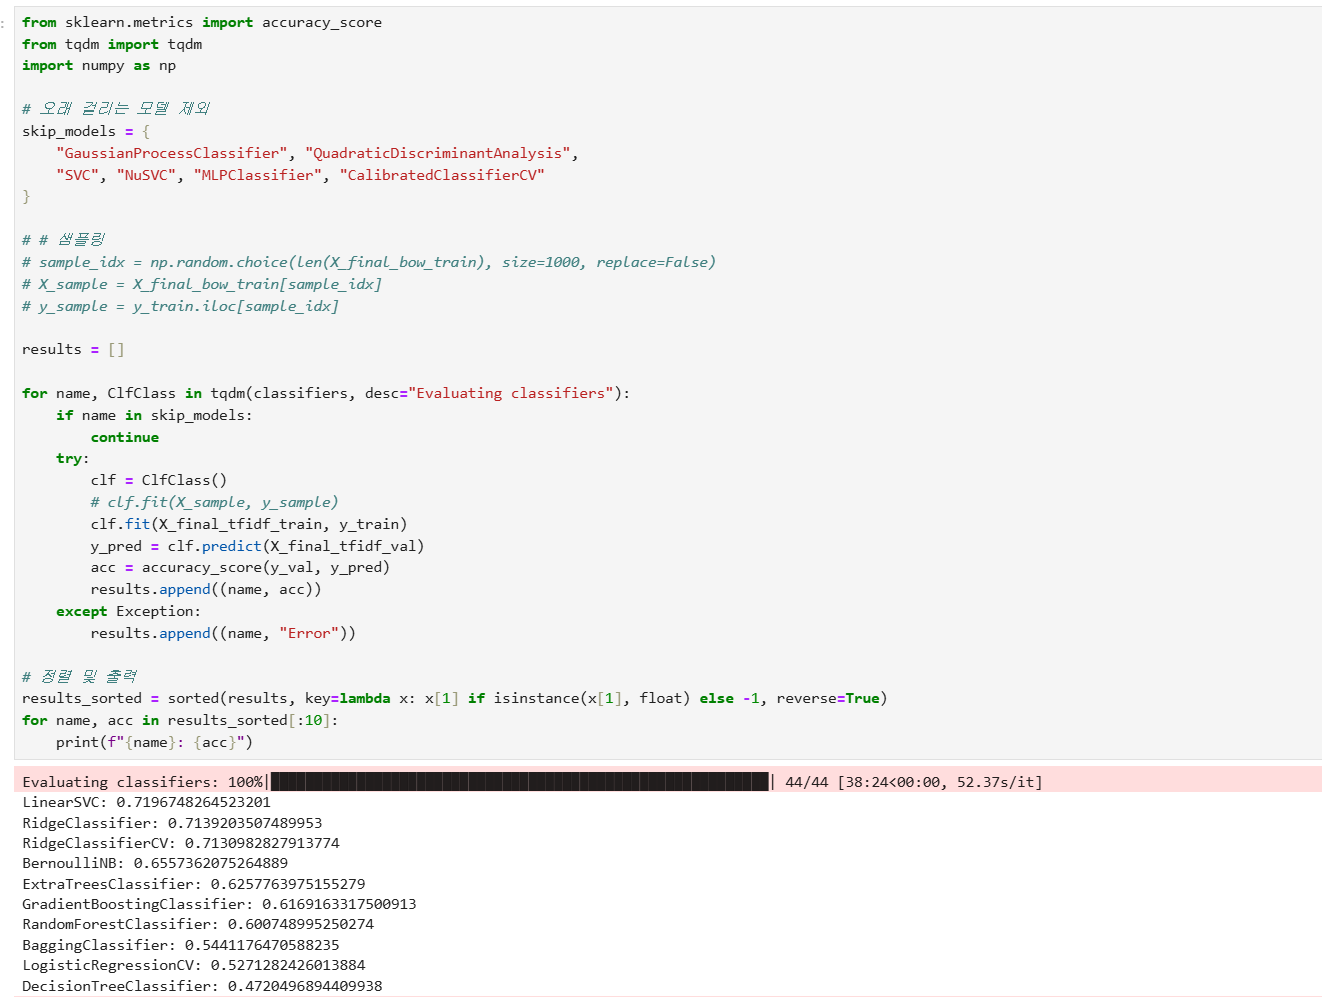

In [ ]:
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm
# import numpy as np

# # Ïò§Îûò Í±∏Î¶¨Îäî Î™®Îç∏ Ï†úÏô∏
# skip_models = {
#     "GaussianProcessClassifier", "QuadraticDiscriminantAnalysis",
#     "SVC", "NuSVC", "MLPClassifier", "CalibratedClassifierCV"
# }

# from scipy.sparse import csr_matrix

# # COO -> CSR Î≥ÄÌôò
# X_final_tfidf_train = X_final_tfidf_train.tocsr()

# # ÏÉòÌîåÎßÅ
# sample_idx = np.random.choice(X_final_tfidf_train.shape[0], size=1000, replace=False)
# X_sample = X_final_tfidf_train[sample_idx]
# y_sample = y_train.iloc[sample_idx]

# results = []

# for name, ClfClass in tqdm(classifiers, desc="Evaluating classifiers"):
#     if name in skip_models:
#         continue
#     try:
#         clf = ClfClass()
#         clf.fit(X_sample, y_sample)
#         clf.fit(X_final_tfidf_train, y_train)
#         y_pred = clf.predict(X_final_tfidf_val)
#         acc = accuracy_score(y_val, y_pred)
#         results.append((name, acc))
#     except Exception:
#         results.append((name, "Error"))

# # Ï†ïÎ†¨ Î∞è Ï∂úÎ†•
# results_sorted = sorted(results, key=lambda x: x[1] if isinstance(x[1], float) else -1, reverse=True)
# for name, acc in results_sorted[:10]:
#     print(f"{name}: {acc}")

### Î™®Îç∏ÎßÅ

In [ ]:
test.head()

index                                               text  text_length  \
0      0  ‚Äúnot at all. i think she is one of the most ch...          456   
1      1  "no," replied he, with sudden consciousness, "...          221   
2      2  as the lady had stated her intention of scream...          375   
3      3  ‚Äúand then suddenly in the silence i heard a so...         1218   
4      4  his conviction remained unchanged. so far as i...          510   

   num_words  mean_word_len  num_unique_words  num_chars  num_stopwords  \
0         89       4.134831                68        456             57   
1         43       4.162791                36        221             36   
2         64       4.875000                55        375             35   
3        240       4.079167               150       1218            148   
4         91       4.615385                71        510             58   

   num_punctuations  num_words_upper  ...  contraction_count  length  \
0                 9         0.056180  ...                  0     456   
1                20         0.116279  ...                  0     221   
2                10         0.000000  ...                  0     375   
3                28         0.045833  ...                  0    1218   
4                13         0.043956  ...                  0     510   

                                              tokens  \
0  ['‚Äú', 'not', 'at', 'all', '.', 'i', 'think', '...   
1  ['``', 'no', ',', "''", 'replied', 'he', ',', ...   
2  ['as', 'the', 'lady', 'had', 'stated', 'her', ...   
3  ['‚Äú', 'and', 'then', 'suddenly', 'in', 'the', ...   
4  ['his', 'conviction', 'remained', 'unchanged',...   

                                               stems  \
0  ['think', 'charm', 'young', 'ladi', 'met', 'us...   
1  ['repli', 'sudden', 'conscious', 'ignor', 'goo...   
2  ['ladi', 'state', 'intent', 'scream', 'cours',...   
3  ['sudden', 'silenc', 'heard', 'sound', 'sent',...   
4  ['convict', 'remain', 'unchang', 'far', 'know'...   

                                    _filtered_tokens  num_stems  num_tokens  \
0  ['think', 'charming', 'young', 'ladies', 'met'...         32          89   
1  ['replied', 'sudden', 'consciousness', 'ignora...         10          46   
2  ['lady', 'stated', 'intention', 'screaming', '...         28          63   
3  ['suddenly', 'silence', 'heard', 'sound', 'sen...         92         240   
4  ['conviction', 'remained', 'unchanged', 'far',...         35          93   

   stopword_ratio                                     stemmed_tokens  \
0        0.640449  ['think', 'charm', 'young', 'ladi', 'met', 'us...   
1        0.782609  ['repli', 'sudden', 'conscious', 'ignor', 'goo...   
2        0.555556  ['ladi', 'state', 'intent', 'scream', 'cours',...   
3        0.616667  ['suddenli', 'silenc', 'heard', 'sound', 'sent...   
4        0.623656  ['convict', 'remain', 'unchang', 'far', 'know'...   

                                   lemmatized_tokens  
0  ['think', 'charm', 'young', 'lady', 'meet', 'u...  
1  ['reply', 'sudden', 'consciousness', 'ignorant...  
2  ['lady', 'state', 'intention', 'scream', 'cour...  
3  ['suddenly', 'silence', 'heard', 'sound', 'sen...  
4  ['conviction', 'remain', 'unchanged', 'far', '...  

[5 rows x 45 columns]

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏõêÎ≥∏ Î≥¥Ìò∏)
X_train_copy = X_final_tfidf_train.copy()
y_train_copy = y_train.copy()
X_val_copy = X_final_tfidf_val.copy()
y_val_copy = y_val.copy()
test_copy = X_final_tfidf_test.copy()

# 1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grids = {
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'max_iter': [1000, 2000]
    },
    'RidgeClassifier': {
        'alpha': [0.5, 1.0, 2.0]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

# 2. Î™®Îç∏ Ï†ïÏùò
models = {
    'LinearSVC': LinearSVC(random_state=42),
    'RidgeClassifier': RidgeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# 3. GridSearchCVÎ°ú ÏµúÏ†Å Î™®Îç∏ ÌÉêÏÉâ
best_model = None
best_score = 0
best_model_name = ''
best_gs = None

for name in ['LinearSVC', 'RidgeClassifier', 'GradientBoosting']:
    print(f"\nüîç GridSearchCV for {name}")
    model = models[name]
    param_grid = param_grids[name]

    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_copy, y_train_copy)

    print(f"Best {name} Params: {grid.best_params_}")
    print(f"{name} Best CV Score: {grid.best_score_:.4f}")

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_model_name = name
        best_gs = grid

print(f"\n‚úÖ Best Model: {best_model_name} with CV Accuracy: {best_score:.4f}")

# 4. Validation Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
val_preds = best_model.predict(X_val_copy)
val_acc = accuracy_score(y_val_copy, val_preds)
print(f"üìä Validation Accuracy on val set: {val_acc:.4f}")

# 5. test Îç∞Ïù¥ÌÑ∞Î°ú ÏµúÏ¢Ö ÏòàÏ∏°
test_preds = best_model.predict(test_copy)


üîç GridSearchCV for LinearSVC
Best LinearSVC Params: {'C': 0.1, 'max_iter': 1000}
LinearSVC Best CV Score: 0.7055

üîç GridSearchCV for RidgeClassifier
Best RidgeClassifier Params: {'alpha': 2.0}
RidgeClassifier Best CV Score: 0.7057

üîç GridSearchCV for GradientBoosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏõêÎ≥∏ Î≥¥Ìò∏)
X_train_copy = X_final_tfidf_train.copy()
y_train_copy = y_train.copy()
X_val_copy = X_final_tfidf_val.copy()
y_val_copy = y_val.copy()
test_copy = X_final_tfidf_test.copy()

# GradientBoostingClassifier ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Î™®Îç∏ Ï†ïÏùò
model = GradientBoostingClassifier(random_state=42)

# GridSearchCV ÏàòÌñâ
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_copy, y_train_copy)

# ÏµúÏ†Å Î™®Îç∏ Î∞è Í≤∞Í≥º Ï∂úÎ†•
best_model = grid.best_estimator_
print(f"\n‚úÖ Best GradientBoosting Params: {grid.best_params_}")
print(f"üìä Best CV Accuracy: {grid.best_score_:.4f}")

# Validation Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ±Îä• ÌèâÍ∞Ä
val_preds = best_model.predict(X_val_copy)
val_acc = accuracy_score(y_val_copy, val_preds)
print(f"üìä Validation Accuracy on val set: {val_acc:.4f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏõêÎ≥∏ Î≥¥Ìò∏)
X_train_copy = X_final_tfidf_train.copy()
y_train_copy = y_train.copy()
X_val_copy = X_final_tfidf_val.copy()
y_val_copy = y_val.copy()
test_copy = X_final_tfidf_test.copy()

# GradientBoostingClassifier ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Î™®Îç∏ Ï†ïÏùò
model = GradientBoostingClassifier(random_state=42)

# GridSearchCV ÏàòÌñâ
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_copy, y_train_copy)

# ÏµúÏ†Å Î™®Îç∏ Î∞è Í≤∞Í≥º Ï∂úÎ†•
best_model = grid.best_estimator_
print(f"\n‚úÖ Best GradientBoosting Params: {grid.best_params_}")
print(f"üìä Best CV Accuracy: {grid.best_score_:.4f}")


‚úÖ Best GradientBoosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
üìä Best CV Accuracy: 0.6657


-> Í∞ÄÏû• ÏÑ±Îä•Ïù¥ ÎÜíÏùÄ RidgeClassifierÏùÑ best_params 2.0ÏúºÎ°ú ÏÑ§Ï†ïÌï¥ Î™®Îç∏ÎßÅ

In [ ]:
import ast
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# === test Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ===
test_copy = test.copy()

# ÌÜ†ÌÅ∞ Î¨∏ÏûêÏó¥ ‚Üí Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
test_copy['_filtered_tokens'] = test_copy['_filtered_tokens'].apply(ast.literal_eval)
test_copy['lemmatized_tokens'] = test_copy['lemmatized_tokens'].apply(ast.literal_eval)
test_copy['stemmed_tokens'] = test_copy['stemmed_tokens'].apply(ast.literal_eval)

# Î¨∏Ïû• ÏÉùÏÑ± (TF-IDF ÏûÖÎ†•Ïö©)
test_copy['doc_for_embedding'] = test_copy['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

# TF-IDF ÏûÑÎ≤†Îî© (trainÏóêÏÑú fitÎêú tfidf ÏÇ¨Ïö©)
X_text_tfidf_test = tfidf.transform(test_copy['doc_for_embedding'])

# === numeric feature Ï≤òÎ¶¨ ===
numeric_feature_columns = [
    'index', 'text_length', 'num_words', 'mean_word_len', 'num_unique_words', 'num_chars',
    'num_stopwords', 'num_punctuations', 'num_words_upper', 'num_words_title',
    'chars_between_comma', 'symbols_unknowns', 'noun', 'adj', 'verbs',
    'sentiment', 'single_frac', 'plural_frac', 'first_word_len', 'last_word_len',
    'first_word_id', 'last_word_id', 'ease', 'num_commas', 'count_The',
    'count_exclam', 'num_sentences', 'mean_sentence_len', 'ttr', 'rare_word_count',
    'rare_word_ratio', 'repetition_rate', 'num_questions', 'num_quotes',
    'contraction_count', 'length', 'num_stems', 'num_tokens', 'stopword_ratio'
]

# Ïä§ÏºÄÏùºÎßÅÏùÑ ÏúÑÌïú Ïª¨Îüº (index Ìè¨Ìï®)
X_test_numeric_with_index = test_copy[numeric_feature_columns]
X_test_scaled_with_index = scaler.transform(X_test_numeric_with_index)  # index Ìè¨Ìï® ÏÉÅÌÉúÎ°ú transform

# Î™®Îç∏ ÏûÖÎ†•ÏóêÏÑúÎäî index Ï†úÍ±∞
index_pos = numeric_feature_columns.index('index')
X_test_scaled = np.delete(X_test_scaled_with_index, index_pos, axis=1)  # numpyÏóêÏÑú index Ïó¥ Ï†úÍ±∞

# TF-IDF Ìù¨ÏÜå ÌñâÎ†¨ + Ïä§ÏºÄÏùºÎêú numeric feature Í≤∞Ìï©
X_final_tfidf_test = hstack([X_text_tfidf_test, X_test_scaled])

print("‚úÖ TF-IDF + numeric features (test) shape:", X_final_tfidf_test.shape)

# === Î™®Îç∏ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù ===
X_train_copy = X_final_tfidf_train.copy()
y_train_copy = y_train.copy()
X_val_copy = X_final_tfidf_val.copy()
y_val_copy = y_val.copy()

final_model = RidgeClassifier(alpha=2.0)
final_model.fit(X_train_copy, y_train_copy)

val_preds = final_model.predict(X_val_copy)
val_accuracy = accuracy_score(y_val_copy, val_preds)
print(f"‚úÖ Validation Accuracy: {val_accuracy:.4f}")

# === ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ===
test_preds = final_model.predict(X_final_tfidf_test)

‚úÖ TF-IDF + numeric features (test) shape: (19606, 5038)
‚úÖ Validation Accuracy: 0.7177


In [ ]:
# submission_copyÎäî Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÎäî DataFrameÏù¥ÎùºÍ≥† Í∞ÄÏ†ï (indexÏôÄ 0~4 Ïó¥ Ìè¨Ìï®)

# Î™®Îì† Í∞íÏùÑ 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî (ÌòπÏãú Ïù¥Ï†Ñ Í∞íÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ ÎåÄÎπÑ)
submission_copy = submission.copy()
submission_copy.iloc[:, 1:] = 0  # Ï≤´ Î≤àÏß∏ Ïó¥ÏùÄ indexÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≥† Ï†úÏô∏

# ÏòàÏ∏°Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï¥Îãπ ÏúÑÏπòÏóê 1 Ìï†Îãπ
for i, pred in enumerate(test_preds):
    submission_copy.iat[i, pred + 1] = 1  # +1ÏùÄ 'index' Ïó¥ Îã§ÏùåÎ∂ÄÌÑ∞ ÌÅ¥ÎûòÏä§ Ïó¥Ïù¥Í∏∞ ÎïåÎ¨∏

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
submission_copy.to_csv("submission_final.csv", index=False)
print("‚úÖ submission_final.csv ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å")


‚úÖ submission_final.csv ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å


- ÏµúÏ¢Ö Í≤∞Í≥º:
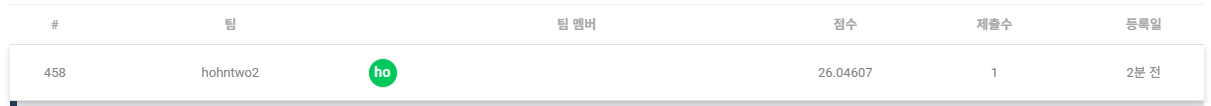

# BERT ÏΩîÎìú

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Ï≤´ Î≤àÏß∏ GPUÎßå ÏÇ¨Ïö©
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
else:
    print('No GPU detected')

1 Physical GPUs, 1 Logical GPUs


In [ ]:
from transformers import TFDistilBertModel, DistilBertTokenizer

# Í∏∞Ï°¥ Î™®Îç∏Î≥¥Îã§ Í≤ΩÎüâÌôîÎêú Î™®Îç∏(DistilBERT)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

(ÌùêÎ¶Ñ)

ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Í≤ΩÎ°ú ÏÑ§Ï†ï -> BERT Tokenizer Î°úÎìú -> ÌÖçÏä§Ìä∏Î•º BERT ÌòïÏãùÏúºÎ°ú Ïù∏ÏΩîÎî© -> BERT Î∂ÑÎ•òÍ∏∞ Î™®Îç∏ Ï†ïÏùò -> Stratified K-FoldÎ°ú ÍµêÏ∞® Í≤ÄÏ¶ù ÌïôÏäµ -> ÏµúÏ¢Ö ÌèâÍ∞Ä

‚ÄúÎ≥¥ÌÜµÏùÄ ÏûÑÎ≤†Îî©Ìïú Îã§ÏùåÏóê LSTMÏù¥ÎÇò CNN Í∞ôÏùÄ Í±∏ Ïç®ÏÑú Î™®Îç∏ÎßÅ(Ïòà: Î¨∏Îß• ÌååÏïÖ, Î∂ÑÎ•ò Îì±)ÏùÑ ÌïòÎäîÎç∞, BERTÎäî ÏûÑÎ≤†Îî©ÌïòÍ≥† ÎÇòÏÑú Î≠òÎ°ú Î™®Îç∏ÎßÅÏùÑ ÌïòÎäîÏßÄ?‚Äù

-> BERTÎäî LSTMÏù¥ÎÇò CNN ÏóÜÏù¥ ÏûêÏ≤¥Ï†ÅÏúºÎ°ú ‚ÄúTransformer Encoder‚Äù Íµ¨Ï°∞ÎßåÏúºÎ°ú Î¨∏Îß•ÏùÑ Ïù¥Ìï¥ÌïòÍ≥† Î™®Îç∏ÎßÅÍπåÏßÄ ÎÅùÎÉÑ.
Ï¶â, Ï∂îÍ∞ÄÏ†ÅÏù∏ Î™®Îç∏ÎßÅÏù¥ ÌïÑÏöî ÏóÜÏù¥, Ïù¥ÎØ∏ BERT ÎÇ¥Î∂ÄÏóêÏÑú Î¨∏Îß•ÏùÑ ÍπäÍ≤å Ïù¥Ìï¥Ìï®



bert_encode Ìï®Ïàò : BERT Î™®Îç∏Ïóê ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†• Í∞ÄÎä•Ìïú ÌòïÌÉúÎ°ú Î≥ÄÌôò(Ï†ÑÏ≤òÎ¶¨) Ìï¥Ï£ºÎäî Ìï®Ïàò

distilbert-base-cased Ïì∏ ÎïåÎäî segment_idsÍ∞Ä ÌïÑÏöî ÏóÜÏùå

In [ ]:
def distilbert_encode(texts, tokenizer, max_len=100):
    all_tokens = []
    all_masks = []

    for text in texts:
        tokens = tokenizer.tokenize(text)
        tokens = tokens[:max_len - 2]
        input_sequence = ['[CLS]'] + tokens + ['[SEP]']

        input_ids = tokenizer.convert_tokens_to_ids(input_sequence)

        pad_len = max_len - len(input_ids)
        input_ids += [0] * pad_len
        attention_mask = [1] * len(input_sequence) + [0] * pad_len
        attention_mask = attention_mask[:max_len]

        all_tokens.append(input_ids)
        all_masks.append(attention_mask)

    return np.array(all_tokens), np.array(all_masks)

- trn : ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(train) Î•º BERT Î™®Îç∏ ÏûÖÎ†•Ïö©ÏúºÎ°ú Ïù∏ÏΩîÎî©Ìïú Í≤∞Í≥º

- tst : ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) Î•º BERT Î™®Îç∏ ÏûÖÎ†•Ïö©ÏúºÎ°ú Ïù∏ÏΩîÎî©Ìïú Í≤∞Í≥º

In [ ]:
max_len = 128 # Î≥¥ÌÜµ Í∏∞Î≥∏Í∞íÏù¥ 128Ïù¥ÎùºÍ≥† Ìï®

trn = distilbert_encode(train.text.values, tokenizer, max_len=max_len)
tst = distilbert_encode(test.text.values, tokenizer, max_len=max_len)
y = train['author'].values
print(trn[0].shape, tst[0].shape, y.shape)

(54879, 128) (19617, 128) (54879,)


- input_word_ids: Îã®Ïñ¥Î•º Ïà´ÏûêÎ°ú Î∞îÍæº Í≤É (BERTÍ∞Ä Ïù¥Ìï¥Ìï† Ïàò ÏûàÎäî ÌòïÌÉú)

- input_mask: Î¨∏Ïû•Ïùò ÏßÑÏßú ÎÇ¥Ïö©ÏùÄ 1, Ìå®Îî©ÏùÄ 0 (BERTÍ∞Ä Ïñ¥ÎîîÍπåÏßÄ ÏùΩÏñ¥Ïïº Ìï†ÏßÄ ÏïåÎ†§Ï§å)

- segment_ids: Î¨∏Ïû• A/B Íµ¨Î∂ÑÏö©

In [ ]:
# BERT Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌÖçÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞(classifier)Î•º ÎßåÎìúÎäî Ìï®Ïàò(Î¨∏Ïû•ÏùÑ ÎÑ£ÏúºÎ©¥ Ïñ¥Îäê ÏûëÍ∞ÄÏùò Í∏ÄÏù∏ÏßÄ ÏòàÏ∏°)

from transformers import TFDistilBertModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

n_class = train['author'].nunique()
max_len = 128

bert_layer = TFDistilBertModel.from_pretrained('distilbert-base-cased')

def get_model(bert_layer, max_len=max_len):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    # segment_ids Ï†úÍ±∞

    def bert_fn(inputs):
        return bert_layer(
            input_ids=inputs[0],
            attention_mask=inputs[1]
            # token_type_ids Ï†úÍ±∞
        ).last_hidden_state[:, 0, :]  # DistilBERTÎäî pooler_output ÏóÜÏúºÎØÄÎ°ú [CLS] ÌÜ†ÌÅ∞ Ï∂úÎ†• ÏÇ¨Ïö©

    # output_shapeÎäî hidden_size=768
    bert_output = Lambda(bert_fn, output_shape=(768,))([input_word_ids, input_mask])

    x = Dense(256, activation='relu')(bert_output)
    out = Dense(n_class, activation='softmax')(x)

    model = Model(inputs=[input_word_ids, input_mask], outputs=out)
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


BERT Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÍµêÏ∞®Í≤ÄÏ†ïÏúºÎ°ú ÌïôÏäµÌïòÍ≥†, Í≤ÄÏ¶ù ÏòàÏ∏°Í∞íÍ≥º ÌÖåÏä§Ìä∏ ÏòàÏ∏°Í∞íÏùÑ ÎßåÎìúÎäî ÏΩîÎìú

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
import gc
import numpy as np
import tensorflow as tf

# y: Ï†ïÎãµ Î†àÏù¥Î∏î Î∞∞Ïó¥, n_class: ÌÅ¥ÎûòÏä§ Ïàò
p_val = np.zeros((trn[0].shape[0], n_class))
p_tst = np.zeros((tst[0].shape[0], n_class))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (i_trn, i_val) in enumerate(cv.split(trn[0], y), 1):
    print(f'training model for CV #{i}')

    es = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2,
                       verbose=1, mode='max', restore_best_weights=True)

    clf = get_model(bert_layer, max_len=max_len)

    if i == 1:
        print(clf.summary())

    clf.fit(
        x={
            "input_word_ids": trn[0][i_trn],
            "input_mask": trn[1][i_trn],
            # "segment_ids": trn[2][i_trn],  # Ï†úÍ±∞Îê®
        },
        y=tf.keras.utils.to_categorical(y[i_trn], num_classes=n_class),
        validation_data=(
            {
                "input_word_ids": trn[0][i_val],
                "input_mask": trn[1][i_val],
                # "segment_ids": trn[2][i_val],  # Ï†úÍ±∞Îê®
            },
            tf.keras.utils.to_categorical(y[i_val], num_classes=n_class)
        ),
        epochs=5,
        batch_size=8,
        callbacks=[es]
    )

    p_val[i_val, :] = clf.predict({
        "input_word_ids": trn[0][i_val],
        "input_mask": trn[1][i_val],
        # "segment_ids": trn[2][i_val],  # Ï†úÍ±∞Îê®
    })

    p_tst += clf.predict({
        "input_word_ids": tst[0],
        "input_mask": tst[1],
        # "segment_ids": tst[2],  # Ï†úÍ±∞Îê®
    }) / 5

    del clf
    clear_session()
    gc.collect()

training model for CV #1


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_word_ids      ‚îÇ (None, 128)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_mask          ‚îÇ (None, 128)       ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lambda (Lambda)     ‚îÇ (None, 768)       ‚îÇ          0 ‚îÇ input_word_ids[0‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ input_mask[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)       ‚îÇ (None, 256)       ‚îÇ    196,864 ‚îÇ lambda[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)     ‚îÇ (None, 5)         ‚îÇ      1,285 ‚îÇ dense[0][0]       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 198,149 (774.02 KB)

 Trainable params: 198,149 (774.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
5488/5488 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 213s 36ms/step - accuracy: 0.3674 - loss: 1.4934 - val_accuracy: 0.5079 - val_loss: 1.3293
Epoch 2/5
5488/5488 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 256s 36ms/step - accuracy: 0.5218 - loss: 1.2980 - val_accuracy: 0.5452 - val_loss: 1.2229
Epoch 3/5
5488/5488 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 198s 35ms/step - accuracy: 0.5578 - loss: 1.2042 - val_accuracy: 0.5682 - val_loss: 1.1591
Epoch 4/5
5488/5488 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 206s 36ms/step - accuracy: 0.5757 - loss: 1.1410 - val_accuracy: 0.5766 - val_loss: 1.1162
Epoch 5/5
5488/5488 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 198s 35ms/step - accuracy: 0.5803 - loss: 1.1102 - val_accuracy: 0.5829 - val_loss: 1.0900
Restoring model weights from the end of the best epoch: 5.
343/343 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 111

In [ ]:
print("p_val shape:", p_val.shape)
print("p_val example:", p_val[:5])  # ÏÉÅÏúÑ 5Í∞ú ÏòàÏãú

print("p_tst shape:", p_tst.shape)
print("p_tst example:", p_tst[:5])

p_val shape: (54879, 5)
p_val example: [[0.26838517 0.08581326 0.0621579  0.4895691  0.09407455]
 [0.36759931 0.20266983 0.26075473 0.11877437 0.05020177]
 [0.17339836 0.61017108 0.02750226 0.15251797 0.03641032]
 [0.03385123 0.01858151 0.68744248 0.02026679 0.239858  ]
 [0.17829025 0.0908103  0.12333387 0.40029803 0.20726754]]
p_tst shape: (19617, 5)
p_tst example: [[0.05133381 0.52909616 0.13645914 0.26537599 0.0177349 ]
 [0.34871941 0.21313095 0.04291945 0.13302579 0.26220442]
 [0.30431745 0.23141384 0.03970382 0.17915035 0.24541455]
 [0.47693457 0.00631925 0.2130023  0.0322695  0.27147438]
 [0.23561693 0.15548439 0.24394381 0.20987855 0.15507632]]


- Îü∞ÌÉÄÏûÑÏù¥ ÎÑàÎ¨¥ Í∏∏Ïñ¥ÏÑú ÌååÏùº Ï†ÄÏû• -> Îã§ÏùåÎ≤àÏóê ÏïàÎèåÎ†§ÎèÑ Í≤∞Í≥º Î≥º Ïàò ÏûàÏùå

In [ ]:
np.savez("/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/·ÑÄ·Ö¢·Ñã·Öµ·Ü´·Ñè·Ö©·ÑÉ·Ö≥/cv_outputs.npz", p_val=p_val, p_tst=p_tst)

In [ ]:
data = np.load("/content/drive/MyDrive/ESAA OB 3·Ñå·Ö©/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥(2)_·Ñâ·Ö©·Ñâ·Ö•·ÜØ·Ñå·Ö°·Ü®·ÑÄ·Ö° ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/·ÑÄ·Ö¢·Ñã·Öµ·Ü´·Ñè·Ö©·ÑÉ·Ö≥/cv_outputs.npz")

p_val = data['p_val']
p_tst = data['p_tst']

In [ ]:
p_val

array([[0.26838517, 0.08581326, 0.0621579 , 0.4895691 , 0.09407455],
       [0.36759931, 0.20266983, 0.26075473, 0.11877437, 0.05020177],
       [0.17339836, 0.61017108, 0.02750226, 0.15251797, 0.03641032],
       ...,
       [0.23739587, 0.14608432, 0.17272593, 0.33530805, 0.1084858 ],
       [0.0955127 , 0.05704457, 0.33224535, 0.46993661, 0.04526073],
       [0.54253429, 0.12646683, 0.10506155, 0.17921004, 0.04672724]])

In [ ]:
p_tst

array([[0.05133381, 0.52909616, 0.13645914, 0.26537599, 0.0177349 ],
       [0.34871941, 0.21313095, 0.04291945, 0.13302579, 0.26220442],
       [0.30431745, 0.23141384, 0.03970382, 0.17915035, 0.24541455],
       ...,
       [0.26597466, 0.63801604, 0.01694618, 0.0232469 , 0.05581624],
       [0.19900554, 0.29008345, 0.21069049, 0.12643203, 0.1737885 ],
       [0.08788904, 0.06976763, 0.11905037, 0.59339549, 0.12989745]])

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
import pandas as pd  # log_lossÏóê one-hot encodingÏù¥ ÌïÑÏöîÌï¥ÏÑú ÏÇ¨Ïö©
import numpy as np

print(f'Accuracy (CV): {accuracy_score(y, np.argmax(p_val, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y), p_val):8.4f}')

Accuracy (CV):  58.5233%
Log Loss (CV):   1.0904


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
